In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
from matplotlib import font_manager, rc
import seaborn as sns

sns.set_style('whitegrid')
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 최빈값 설정
from scipy.stats import mode
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
# '-'가 깨지는 것 방지
plt.rcParams['axes.unicode_minus'] = False

In [7]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',999)

# 데이터 불러오기

In [8]:
# 연도별 구직자 데이터 불러오기
seeker16 = pd.read_excel('../data/워크넷/인천시 워크넷 구인구직 자료.xlsx', sheet_name = '구직2016')
seeker17 = pd.read_excel('../data/워크넷/인천시 워크넷 구인구직 자료.xlsx', sheet_name = '구직 2017')
seeker18 = pd.read_excel('../data/워크넷/인천시 워크넷 구인구직 자료.xlsx', sheet_name = '구직 2018')
seeker19 = pd.read_excel('../data/워크넷/인천시 워크넷 구인구직 자료.xlsx', sheet_name = '구직 2019')
seeker20 = pd.read_excel('../data/워크넷/인천시 워크넷 구인구직 자료.xlsx', sheet_name = '구직 2020')

In [147]:
#a = pd.read_csv('../data/워크넷/구직자.csv', encoding = 'cp949')
#del a['Unnamed: 0']

In [9]:
# 직업분류표
class_t = pd.read_excel('../data/한국고용직업분류/분류표.xlsx')

In [10]:
# 결측치 처리
class_t = class_t.fillna(method='ffill')

In [11]:
class_t.columns = ['대분류코드','대분류','중분류코드','중분류','소분류코드','소분류','세분류코드','세분류']

In [12]:
del seeker16['Unnamed: 0']
del seeker17['Unnamed: 0']
del seeker18['Unnamed: 0']
del seeker19['Unnamed: 0']
del seeker20['Unnamed: 0']

In [190]:
seeker = pd.concat([seeker16, seeker17, seeker18, seeker19, seeker20])
seeker = seeker.reset_index(drop = True)

In [191]:
# 데이터 갯수 확인
seeker.shape

(1160510, 53)

In [192]:
seeker16 = seeker.loc[seeker['연도'] == 2016]
seeker17 = seeker.loc[seeker['연도'] == 2017]
seeker18 = seeker.loc[seeker['연도'] == 2018]
seeker19 = seeker.loc[seeker['연도'] == 2019]
seeker20 = seeker.loc[seeker['연도'] == 2020]

# 결측치 파악

In [193]:
def nan_plot(data):
    fig, ax = plt.subplots(1,1, figsize = (8,15))
    ((data.isnull().sum() / data.shape[0]) * 100).sort_values(ascending = True).plot.barh(ax = ax)
    plt.show()

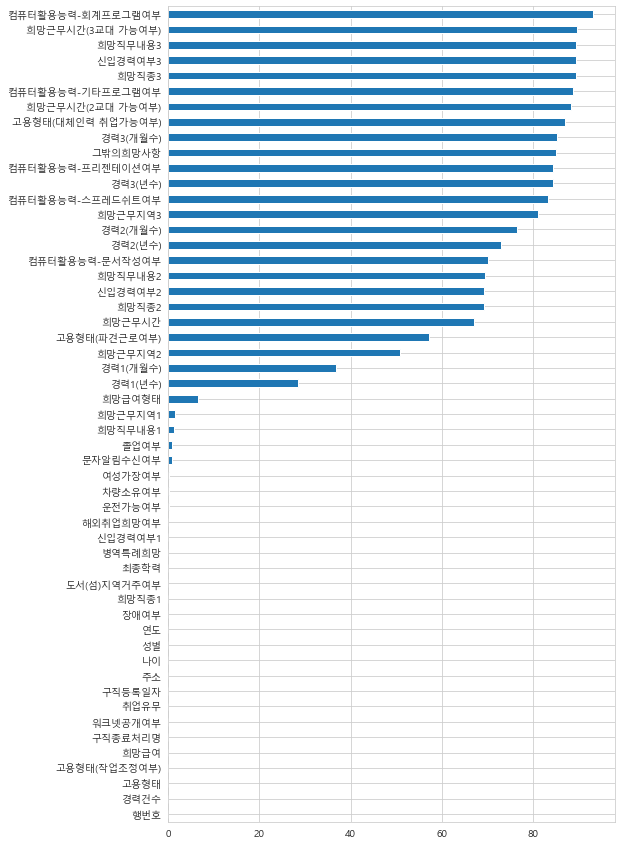

In [194]:
nan_plot(seeker)

In [195]:
# 결측치 40%이상 변수 확인
seeker_null = ((seeker.isnull().sum() / seeker.shape[0]) * 100).sort_values(ascending = False)
seeker_null[seeker_null >= 40]

컴퓨터활용능력-회계프로그램여부     93.331294
희망근무시간(3교대 가능여부)     89.627491
희망직무내용3              89.548905
신입경력여부3              89.452741
희망직종3                89.437920
컴퓨터활용능력-기타프로그램여부     88.921767
희망근무시간(2교대 가능여부)     88.483425
고용형태(대체인력 취업가능여부)    87.114286
경력3(개월수)             85.404348
그밖의희망사항              85.143945
컴퓨터활용능력-프리젠테이션여부     84.481478
경력3(년수)              84.344814
컴퓨터활용능력-스프레드쉬트여부     83.276835
희망근무지역3              81.169572
경력2(개월수)             76.550224
경력2(년수)              73.109150
컴퓨터활용능력-문서작성여부       70.225677
희망직무내용2              69.542529
신입경력여부2              69.280058
희망직종2                69.237663
희망근무시간               67.131520
고용형태(파견근로여부)         57.212260
희망근무지역2              50.942861
dtype: float64

# 구직자

## 타겟 데이터 확인(취업유무)

In [196]:
# 그래프의 폭을 줄이는 함수
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

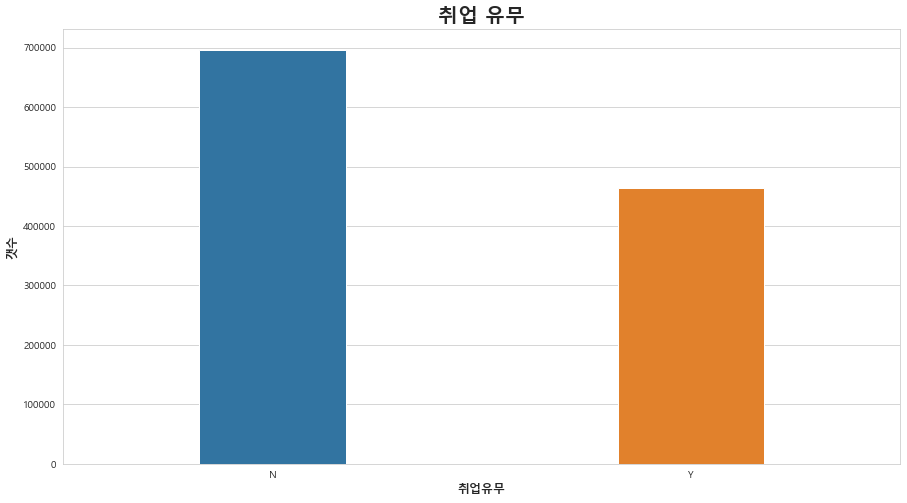

In [197]:
fig, ax = plt.subplots(1,1, figsize = (15,8))
sns.countplot(x = '취업유무', data = seeker , ax =ax)
change_width(ax, .35)
plt.title('취업 유무', fontsize = 20, fontweight = 'bold')
plt.xlabel('취업유무', fontsize = 12, fontweight = 'bold')
plt.ylabel('갯수', fontsize = 12, fontweight = 'bold')
plt.show()

## 경력, 나이대 파악

나이대와 경력이 안맞는 경우가 있다.

In [198]:
# 나이 분포 확인
seeker['나이'].value_counts()

20대    263492
50대    233155
30대    221527
40대    219045
60대    162760
70대     29887
10대     27405
그 외      3239
Name: 나이, dtype: int64

In [199]:
seeker[['경력1(년수)','경력1(개월수)','나이']].describe()

,경력1(년수),경력1(개월수)
count,830523.00000,732277.000000
mean,6.19406,1.662303
std,7.86857,3.003561
min,0.00000,0.000000
25%,0.00000,0.000000
50%,3.00000,0.000000
75%,10.00000,2.000000
max,99.00000,20.000000


In [200]:
# 결측치 0으로 채우고 확인
# 10대
sk10 = seeker.loc[(seeker['나이'] == '10대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk10['경력1(개월수)'] = sk10['경력1(개월수)'].fillna(0)

# 20대
sk20 = seeker.loc[(seeker['나이'] == '20대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk20['경력1(개월수)'] = sk20['경력1(개월수)'].fillna(0)

# 30대
sk30 = seeker.loc[(seeker['나이'] == '30대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk30['경력1(개월수)'] = sk30['경력1(개월수)'].fillna(0)

# 40대
sk40 = seeker.loc[(seeker['나이'] == '40대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk40['경력1(개월수)'] = sk40['경력1(개월수)'].fillna(0)

# 50대
sk50 = seeker.loc[(seeker['나이'] == '50대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk50['경력1(개월수)'] = sk50['경력1(개월수)'].fillna(0)

# 60대
sk60 = seeker.loc[(seeker['나이'] == '60대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk60['경력1(개월수)'] = sk60['경력1(개월수)'].fillna(0)

# 70대
sk70 = seeker.loc[(seeker['나이'] == '70대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk70['경력1(개월수)'] = sk70['경력1(개월수)'].fillna(0)

### 이상치 파악

In [201]:
# 분포 파악을 좀 더 쉽게 하기 위해 데이터 표준화 실시
scaler = StandardScaler()
scaled10 = scaler.fit_transform(sk10['경력1(년수)'].dropna().values.reshape(-1,1))
scaled20 = scaler.fit_transform(sk20['경력1(년수)'].dropna().values.reshape(-1,1))
scaled30 = scaler.fit_transform(sk30['경력1(년수)'].dropna().values.reshape(-1,1))
scaled40 = scaler.fit_transform(sk40['경력1(년수)'].dropna().values.reshape(-1,1))
scaled50 = scaler.fit_transform(sk50['경력1(년수)'].dropna().values.reshape(-1,1))
scaled60 = scaler.fit_transform(sk60['경력1(년수)'].dropna().values.reshape(-1,1))
scaled70 = scaler.fit_transform(sk70['경력1(년수)'].dropna().values.reshape(-1,1))

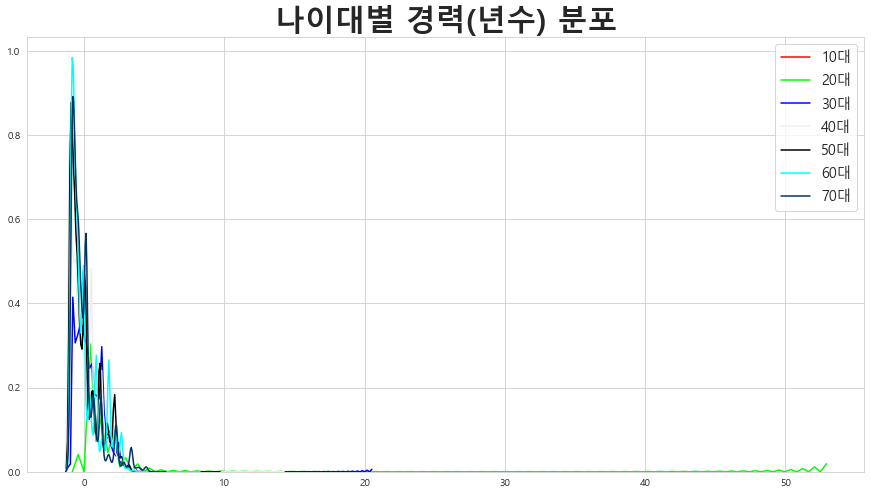

In [202]:
fig, ax = plt.subplots(1,1, figsize = (15,8))
sns.distplot(scaled10, hist=False, ax = ax, color = '#ff0000', label = '10대')
sns.distplot(scaled20, hist=False, ax = ax, color = '#00ff00', label = '20대')
sns.distplot(scaled30, hist=False, ax = ax, color = '#0000ff', label = '30대')
sns.distplot(scaled40, hist=False, ax = ax, color = '#eeeeee', label = '40대')
sns.distplot(scaled50, hist=False, ax = ax, color = '#000000', label = '50대')
sns.distplot(scaled60, hist=False, ax = ax, color = '#00ffff', label = '60대')
sns.distplot(scaled70, hist=False, ax = ax, color = '#003366', label = '70대')
plt.title('나이대별 경력(년수) 분포', fontsize = 30, fontweight = 'bold')
plt.legend(fontsize='x-large')
plt.savefig('../fig/나이대별 경력(년수) 분포.png', bbox_inches='tight')
plt.show()

In [203]:
seeker2 = seeker[['나이','경력1(년수)','경력1(개월수)','경력건수','취업유무']].copy()
seeker2.fillna(0, inplace = True)

In [204]:
# 분포 파악을 좀 더 쉽게 하기 위해 데이터 표준화 실시
scaler = StandardScaler()
scaled10 = scaler.fit_transform(sk10['경력건수'].dropna().values.reshape(-1,1))
scaled20 = scaler.fit_transform(sk20['경력건수'].dropna().values.reshape(-1,1))
scaled30 = scaler.fit_transform(sk30['경력건수'].dropna().values.reshape(-1,1))
scaled40 = scaler.fit_transform(sk40['경력건수'].dropna().values.reshape(-1,1))
scaled50 = scaler.fit_transform(sk50['경력건수'].dropna().values.reshape(-1,1))
scaled60 = scaler.fit_transform(sk60['경력건수'].dropna().values.reshape(-1,1))
scaled70 = scaler.fit_transform(sk70['경력건수'].dropna().values.reshape(-1,1))

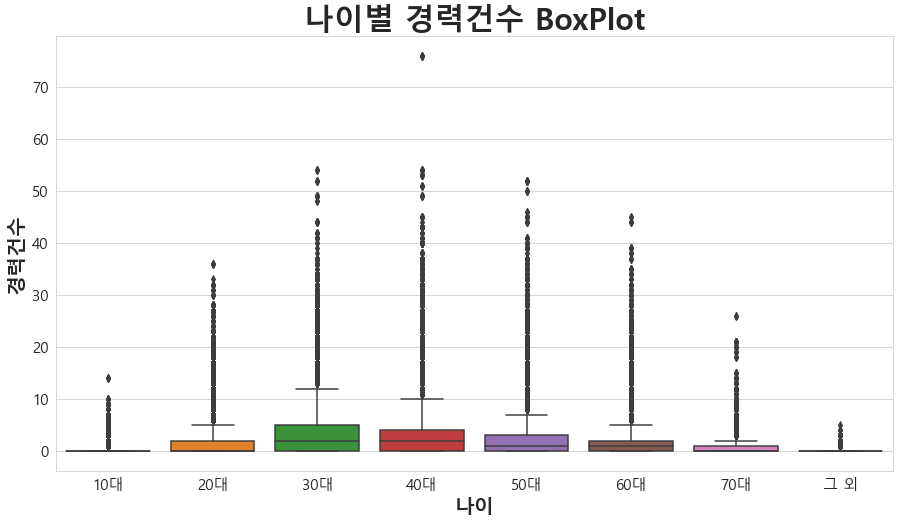

In [205]:
fig, ax = plt.subplots(1,1, figsize = (15,8))
sns.boxplot(x = '나이', y = '경력건수', data = seeker2, ax = ax, order = ['10대','20대','30대','40대','50대','60대','70대','그 외'])
plt.title('나이별 경력건수 BoxPlot', fontsize = 30, fontweight = 'bold')
plt.xlabel('나이', fontsize = 20, fontweight = 'bold')
plt.ylabel('경력건수', fontsize = 20, fontweight = 'bold')
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
plt.savefig('../fig/나이별 경력건수 BoxPlot.png', bbox_inches='tight')
plt.show()

In [206]:
# 히스토그램
def histo_box(data):
    fig, ax = plt.subplots(2,2, figsize = (20,15))

    sns.distplot(data['경력1(년수)'], ax = ax[0,0])
    ax[0,0].set_title('경력 년수', fontsize = 15, fontweight = 'bold')
    ax[0,0].tick_params(axis="x", labelsize=12)

    sns.distplot(data['경력1(개월수)'], ax = ax[0,1])
    ax[0,1].set_title('경력 개월수', fontsize = 15, fontweight = 'bold')
    ax[0,1].tick_params(axis = 'x', labelsize = 12)

    sns.boxplot(x = '경력1(년수)', data = data, ax = ax[1,0])
    ax[1,0].set_title('경력 년수 boxplot', fontsize = 15, fontweight = 'bold')
    ax[1,0].tick_params(axis = 'x', labelsize = 12)

    sns.boxplot(x = '경력1(개월수)', data = data, ax = ax[1,1])
    ax[1,1].set_title('경력 월수 boxplot', fontsize = 15, fontweight = 'bold')
    ax[1,1].tick_params(axis = 'x', labelsize = 12)

    fig.show()

# 이상치 파악 1    
def detect_outliers(data, col):

    q1 = np.percentile(data[col].dropna(), 25)
    q3 = np.percentile(data[col].dropna(), 75)
    iqr = q3 - q1
    return data.loc[(data[col] < q1 - 1.5*iqr)|(data[col] > q3 + 1.5*iqr)]


# 이상치 파악 3(이상치를 좀 더 좁은 범위로 확인)
def detect_outliers3(data, col):
    q1 = np.percentile(data[col].dropna(), 25)
    q3 = np.percentile(data[col].dropna(), 75)
    iqr = q3 - q1
    return data.loc[(data[col] < q1 - 2*iqr)|(data[col] > q3 + 2*iqr)]

__경력 변수 이상치__

In [207]:
# 10대
sk10 = seeker.loc[(seeker['나이'] == '10대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk10['경력1(개월수)'] = sk10['경력1(개월수)'].fillna(0)

# 20대
sk20 = seeker.loc[(seeker['나이'] == '20대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk20['경력1(개월수)'] = sk20['경력1(개월수)'].fillna(0)

# 30대
sk30 = seeker.loc[(seeker['나이'] == '30대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk30['경력1(개월수)'] = sk30['경력1(개월수)'].fillna(0)

# 40대
sk40 = seeker.loc[(seeker['나이'] == '40대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk40['경력1(개월수)'] = sk40['경력1(개월수)'].fillna(0)

# 50대
sk50 = seeker.loc[(seeker['나이'] == '50대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk50['경력1(개월수)'] = sk50['경력1(개월수)'].fillna(0)

# 60대
sk60 = seeker.loc[(seeker['나이'] == '60대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk60['경력1(개월수)'] = sk60['경력1(개월수)'].fillna(0)

# 70대
sk70 = seeker.loc[(seeker['나이'] == '70대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk70['경력1(개월수)'] = sk70['경력1(개월수)'].fillna(0)

In [208]:
print(f"10대 경력(년수) 이상치 : {round(detect_outliers3(sk10, '경력1(년수)').shape[0] / sk10.shape[0],2) * 100}%")
print(f"20대 경력(년수) 이상치 : {round(detect_outliers3(sk20, '경력1(년수)').shape[0] / sk20.shape[0],2) * 100}%")
print(f"30대 경력(년수) 이상치 : {round(detect_outliers3(sk30, '경력1(년수)').shape[0] / sk30.shape[0],2) * 100}%")
print(f"40대 경력(년수) 이상치 : {round(detect_outliers3(sk40, '경력1(년수)').shape[0] / sk40.shape[0],2) * 100}%")
print(f"50대 경력(년수) 이상치 : {round(detect_outliers3(sk50, '경력1(년수)').shape[0] / sk50.shape[0],2) * 100}%")
print(f"60대 경력(년수) 이상치 : {round(detect_outliers3(sk60, '경력1(년수)').shape[0] / sk60.shape[0],2) * 100}%")
print(f"70대 경력(년수) 이상치 : {round(detect_outliers3(sk70, '경력1(년수)').shape[0] / sk70.shape[0],2) * 100}%")

10대 경력(년수) 이상치 : 2.0%
20대 경력(년수) 이상치 : 1.0%
30대 경력(년수) 이상치 : 0.0%
40대 경력(년수) 이상치 : 0.0%
50대 경력(년수) 이상치 : 0.0%
60대 경력(년수) 이상치 : 0.0%
70대 경력(년수) 이상치 : 3.0%


__경력 & 경력건수 이상치__

In [209]:
print(f"10대 경력(년수)|경력건수 이상치 : {round(sk10.loc[(detect_outliers3(sk10, '경력1(년수)').index)|(detect_outliers3(sk10, '경력건수').index)].shape[0] / sk10.shape[0],2) * 100}%")
print(f"20대 경력(년수)|경력건수 이상치 : {round(sk20.loc[(detect_outliers3(sk20, '경력1(년수)').index)|(detect_outliers3(sk20, '경력건수').index)].shape[0] / sk20.shape[0],2) * 100}%")
print(f"30대 경력(년수)|경력건수 이상치 : {round(sk30.loc[(detect_outliers3(sk30, '경력1(년수)').index)|(detect_outliers3(sk30, '경력건수').index)].shape[0] / sk30.shape[0],2) * 100}%")
print(f"40대 경력(년수)|경력건수 이상치 : {round(sk40.loc[(detect_outliers3(sk40, '경력1(년수)').index)|(detect_outliers3(sk40, '경력건수').index)].shape[0] / sk40.shape[0],2) * 100}%")
print(f"50대 경력(년수)|경력건수 이상치 : {round(sk50.loc[(detect_outliers3(sk50, '경력1(년수)').index)|(detect_outliers3(sk50, '경력건수').index)].shape[0] / sk50.shape[0],2) * 100}%")
print(f"60대 경력(년수)|경력건수 이상치 : {round(sk60.loc[(detect_outliers3(sk60, '경력1(년수)').index)|(detect_outliers3(sk60, '경력건수').index)].shape[0] / sk60.shape[0],2) * 100}%")
print(f"70대 경력(년수)|경력건수 이상치 : {round(sk70.loc[(detect_outliers3(sk70, '경력1(년수)').index)|(detect_outliers3(sk70, '경력건수').index)].shape[0] / sk70.shape[0],2) * 100}%")

10대 경력(년수)|경력건수 이상치 : 13.0%
20대 경력(년수)|경력건수 이상치 : 4.0%
30대 경력(년수)|경력건수 이상치 : 1.0%
40대 경력(년수)|경력건수 이상치 : 3.0%
50대 경력(년수)|경력건수 이상치 : 3.0%
60대 경력(년수)|경력건수 이상치 : 4.0%
70대 경력(년수)|경력건수 이상치 : 6.0%


In [210]:
# 이상치 제거를 위한 인덱스 추출
index10 = sk10.loc[(detect_outliers3(sk10, '경력1(년수)').index)|(detect_outliers3(sk10, '경력건수').index)].index
index20 = sk20.loc[(detect_outliers3(sk20, '경력1(년수)').index)|(detect_outliers3(sk20, '경력건수').index)].index
index30 = sk30.loc[(detect_outliers3(sk30, '경력1(년수)').index)|(detect_outliers3(sk30, '경력건수').index)].index
index40 = sk40.loc[(detect_outliers3(sk40, '경력1(년수)').index)|(detect_outliers3(sk40, '경력건수').index)].index
index50 = sk50.loc[(detect_outliers3(sk50, '경력1(년수)').index)|(detect_outliers3(sk50, '경력건수').index)].index
index60 = sk60.loc[(detect_outliers3(sk60, '경력1(년수)').index)|(detect_outliers3(sk60, '경력건수').index)].index
index70 = sk70.loc[(detect_outliers3(sk70, '경력1(년수)').index)|(detect_outliers3(sk70, '경력건수').index)].index

In [211]:
print(f"전체 경력(년수) 이상치 : {round(seeker.loc[index10|index20|index30|index40|index50|index60|index70].shape[0] / seeker.shape[0],2) * 100}%")

전체 경력(년수) 이상치 : 3.0%


In [212]:
# 이상치 제거
out_idx = seeker.loc[index10|index20|index30|index40|index50|index60|index70].index
sk_df = seeker.drop(index=out_idx).reset_index(drop = True)

In [213]:
# 이상치 제거 후 데이터 확인
sk_df.shape

(1121436, 53)

In [214]:
# 나이대 별로 데이터 확인을 위해 데이터 분리
# 10대
sk10 = sk_df.loc[(sk_df['나이'] == '10대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk10['경력1(개월수)'] = sk10['경력1(개월수)'].fillna(0)

# 20대
sk20 = sk_df.loc[(sk_df['나이'] == '20대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk20['경력1(개월수)'] = sk20['경력1(개월수)'].fillna(0)

# 30대
sk30 = sk_df.loc[(sk_df['나이'] == '30대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk30['경력1(개월수)'] = sk30['경력1(개월수)'].fillna(0)

# 40대
sk40 = sk_df.loc[(sk_df['나이'] == '40대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk40['경력1(개월수)'] = sk40['경력1(개월수)'].fillna(0)

# 50대
sk50 = sk_df.loc[(sk_df['나이'] == '50대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk50['경력1(개월수)'] = sk50['경력1(개월수)'].fillna(0)

# 60대
sk60 = sk_df.loc[(sk_df['나이'] == '60대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk60['경력1(개월수)'] = sk60['경력1(개월수)'].fillna(0)

# 70대
sk70 = sk_df.loc[(sk_df['나이'] == '70대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk70['경력1(개월수)'] = sk70['경력1(개월수)'].fillna(0)

### 10대

In [215]:
sk10[['경력1(년수)','경력1(개월수)','경력건수']].describe()

,경력1(년수),경력1(개월수),경력건수
count,7179.0,23844.000000,23844.0
mean,0.0,0.081362,0.0
std,0.0,0.740219,0.0
min,0.0,0.000000,0.0
25%,0.0,0.000000,0.0
50%,0.0,0.000000,0.0
75%,0.0,0.000000,0.0
max,0.0,11.000000,0.0


In [216]:
#sk10 = seeker.loc[(seeker['나이'] == '10대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
#sk10['경력1(개월수)'] = sk10['경력1(개월수)'].fillna(0)

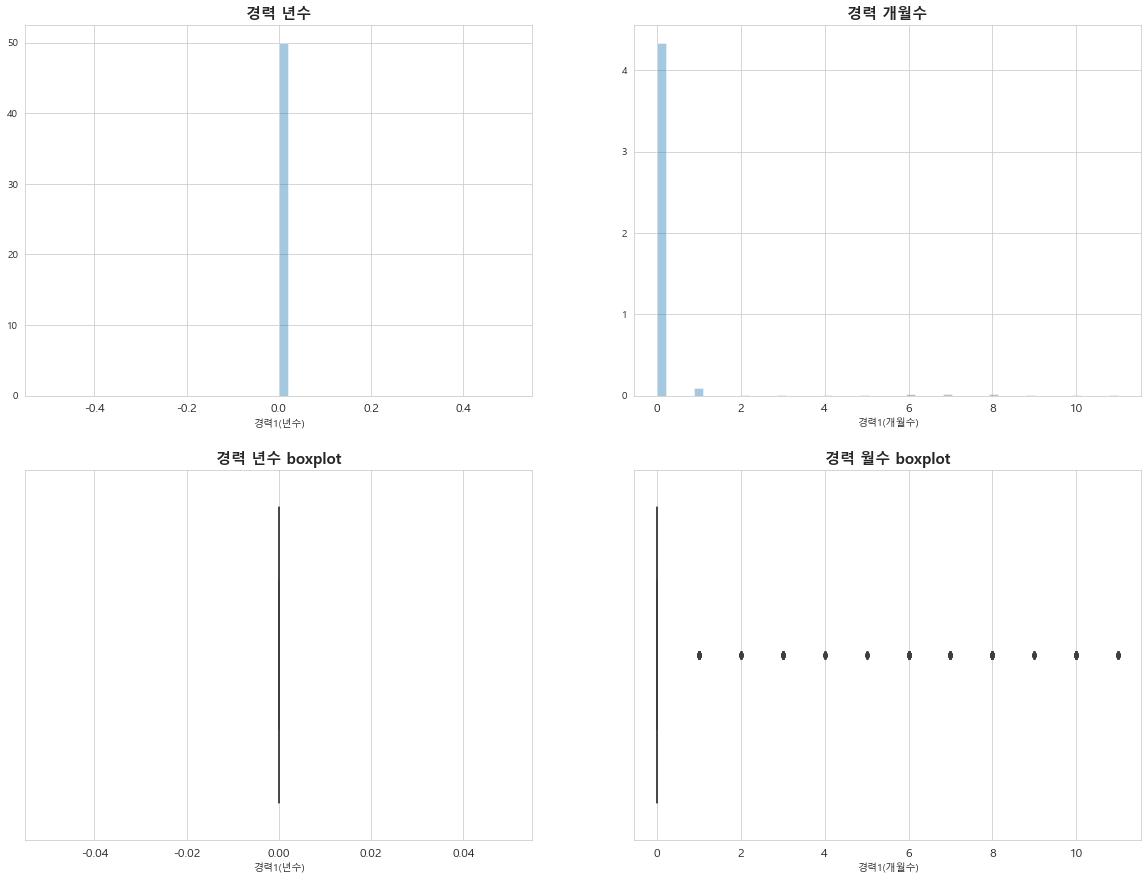

In [217]:
histo_box(sk10.dropna())

### 20대

In [218]:
sk20[['경력1(년수)','경력1(개월수)','경력건수']].describe()

,경력1(년수),경력1(개월수),경력건수
count,153527.000000,253156.000000,253156.000000
mean,0.977678,0.818523,1.014177
std,1.530208,2.279953,1.515358
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000
max,6.000000,12.000000,6.000000


경력1(년수)가 비정상적으로 높은 것은 어떻게 처리해야 될까.

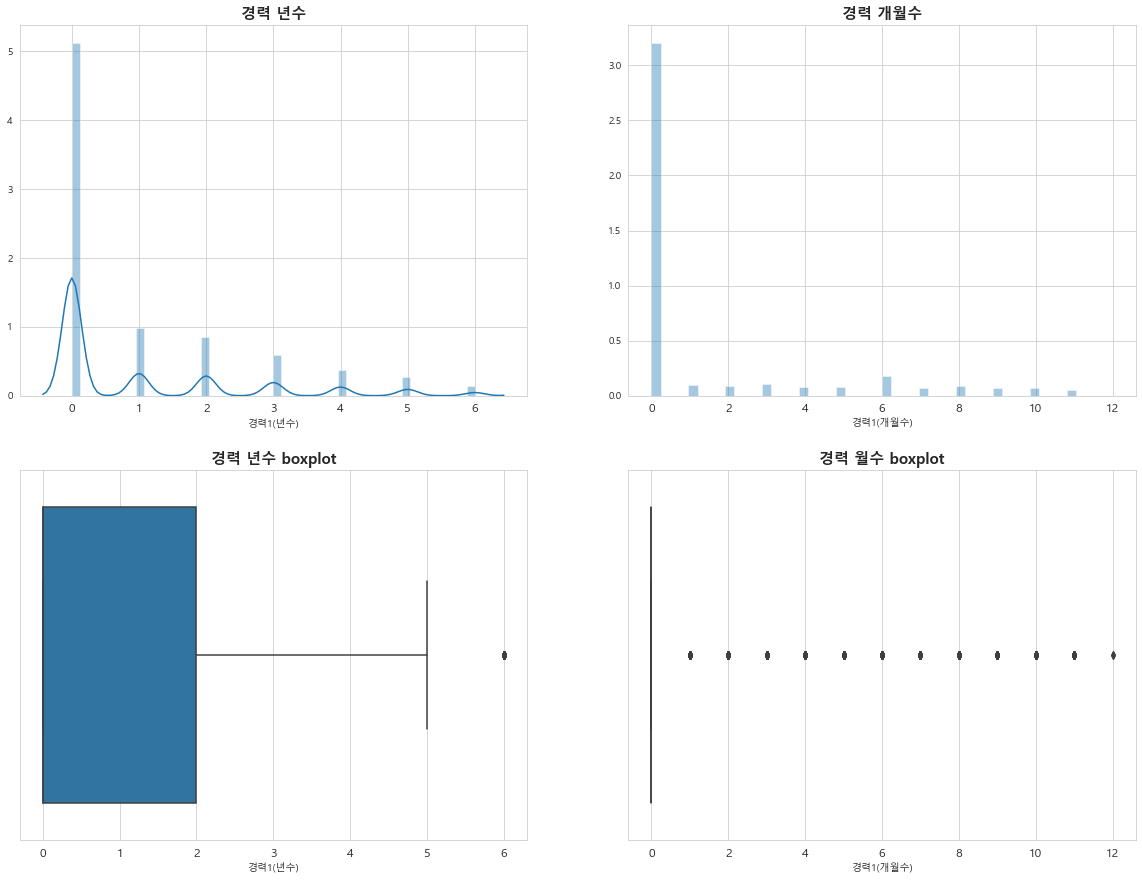

In [219]:
histo_box(sk20.dropna())

In [220]:
sk20['경력1(년수)'].value_counts().sort_values(ascending = True)

6.0     2490
5.0     5114
4.0     6925
3.0    10746
2.0    15790
1.0    18072
0.0    94390
Name: 경력1(년수), dtype: int64

In [221]:
sk20['경력건수'].value_counts().sort_values(ascending = True)

6      4208
5      6711
4     12780
3     19623
2     26702
1     34549
0    148583
Name: 경력건수, dtype: int64

### 30대

In [222]:
sk30[['경력1(년수)','경력1(개월수)','경력건수']].describe()

,경력1(년수),경력1(개월수),경력건수
count,180911.000000,218846.000000,218846.000000
mean,4.438531,1.357146,2.867217
std,4.234280,2.810668,2.959492
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,3.000000,0.000000,2.000000
75%,7.000000,0.000000,4.000000
max,21.000000,11.000000,15.000000


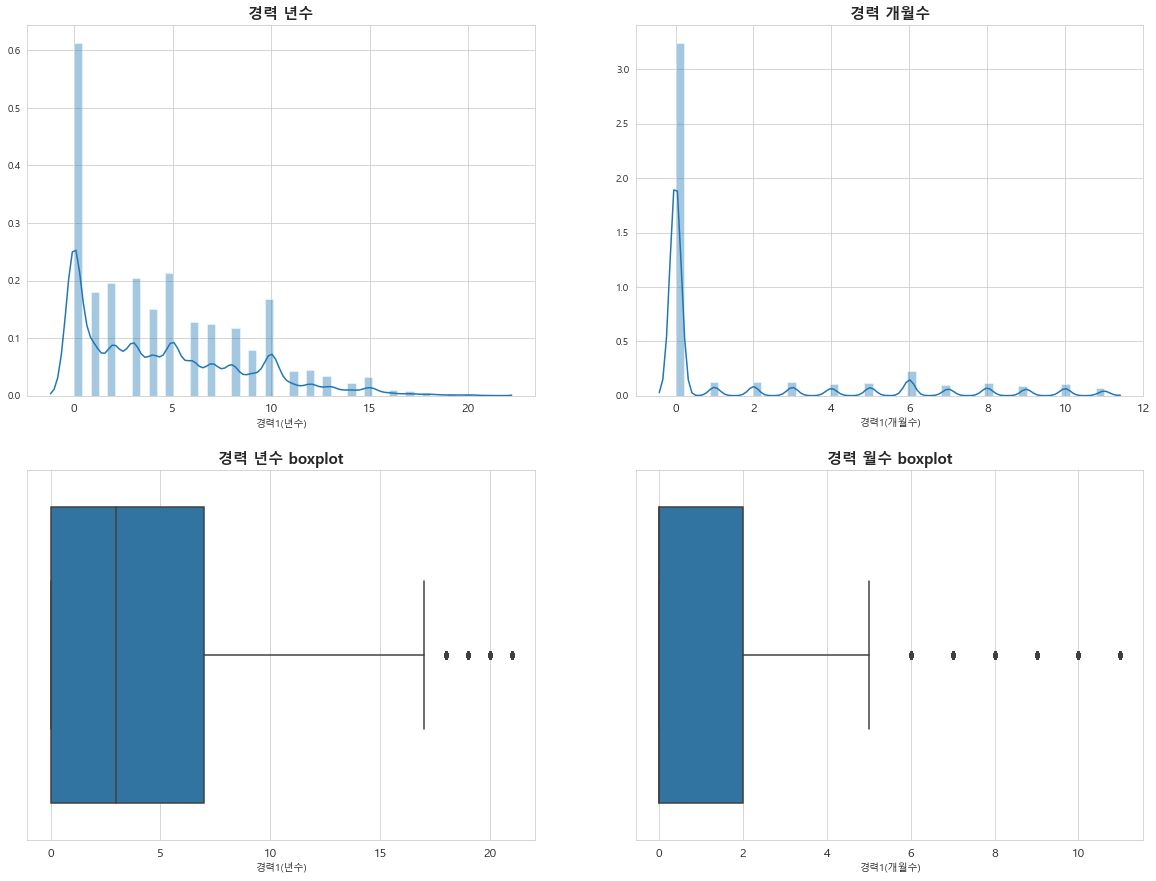

In [223]:
histo_box(sk30.dropna())

### 40대

In [224]:
sk40[['경력1(년수)','경력1(개월수)','경력건수']].describe()

,경력1(년수),경력1(개월수),경력건수
count,168999.000000,212406.000000,212406.000000
mean,6.700146,1.237644,2.518144
std,6.383406,2.704654,2.789485
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,5.000000,0.000000,2.000000
75%,10.000000,0.000000,4.000000
max,28.000000,11.000000,12.000000


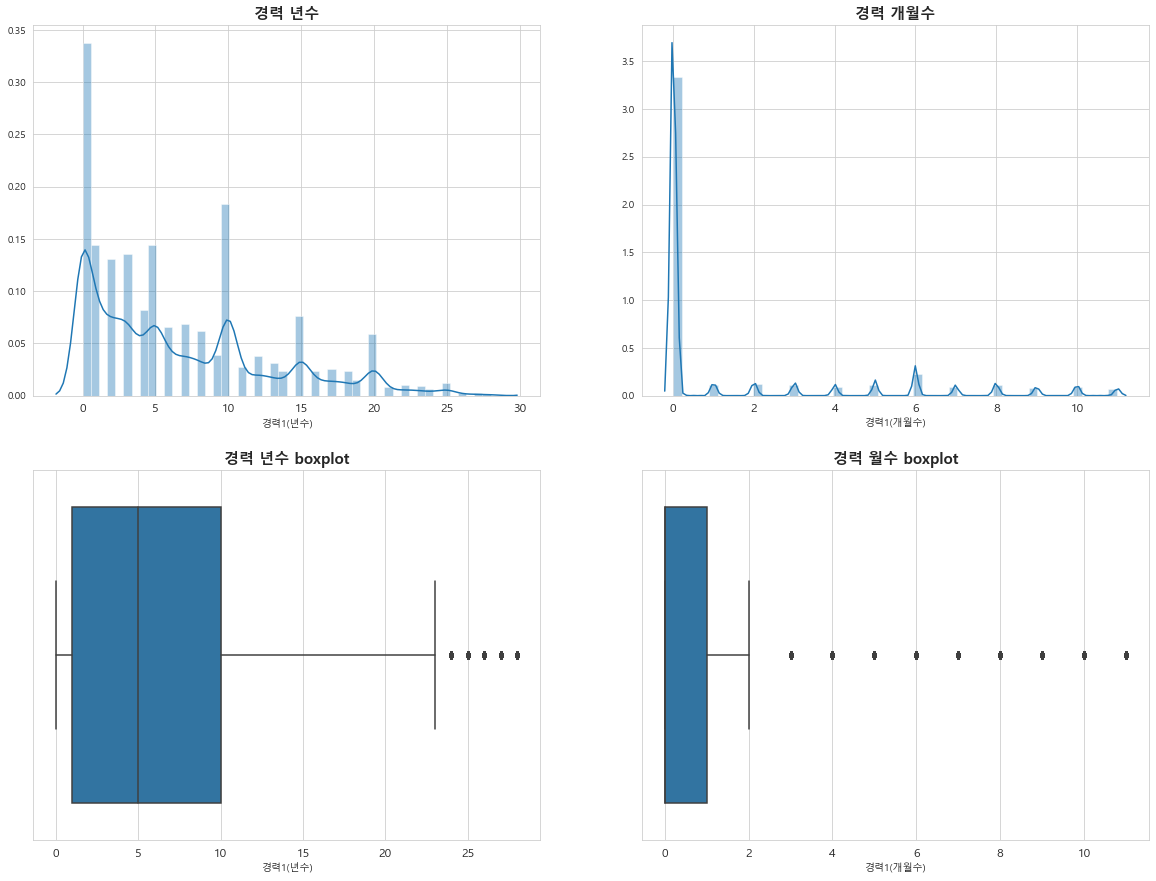

In [225]:
histo_box(sk40.dropna())

### 50대

In [226]:
sk50[['경력1(년수)','경력1(개월수)','경력건수']].describe()

,경력1(년수),경력1(개월수),경력건수
count,165911.000000,226153.000000,226153.000000
mean,9.279343,1.007026,1.480219
std,9.448656,2.448159,2.005643
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,6.000000,0.000000,1.000000
75%,15.000000,0.000000,2.000000
max,41.000000,20.000000,9.000000


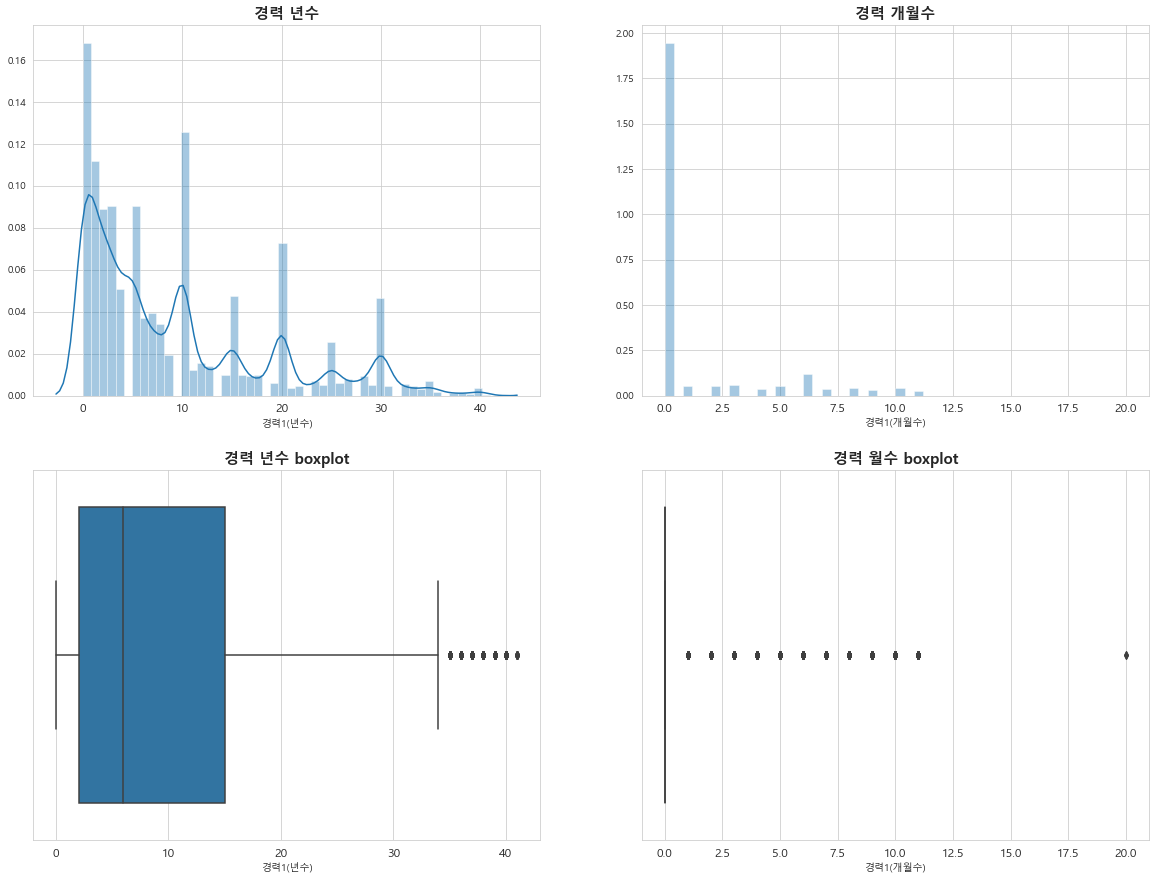

In [227]:
histo_box(sk50.dropna())

### 60대

In [228]:
sk60[['경력1(년수)','경력1(개월수)','경력건수']].describe()

,경력1(년수),경력1(개월수),경력건수
count,109203.000000,155697.000000,155697.000000
mean,10.227402,0.932683,1.057310
std,10.718658,2.356406,1.455435
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,6.000000,0.000000,0.000000
75%,15.000000,0.000000,2.000000
max,41.000000,11.000000,6.000000


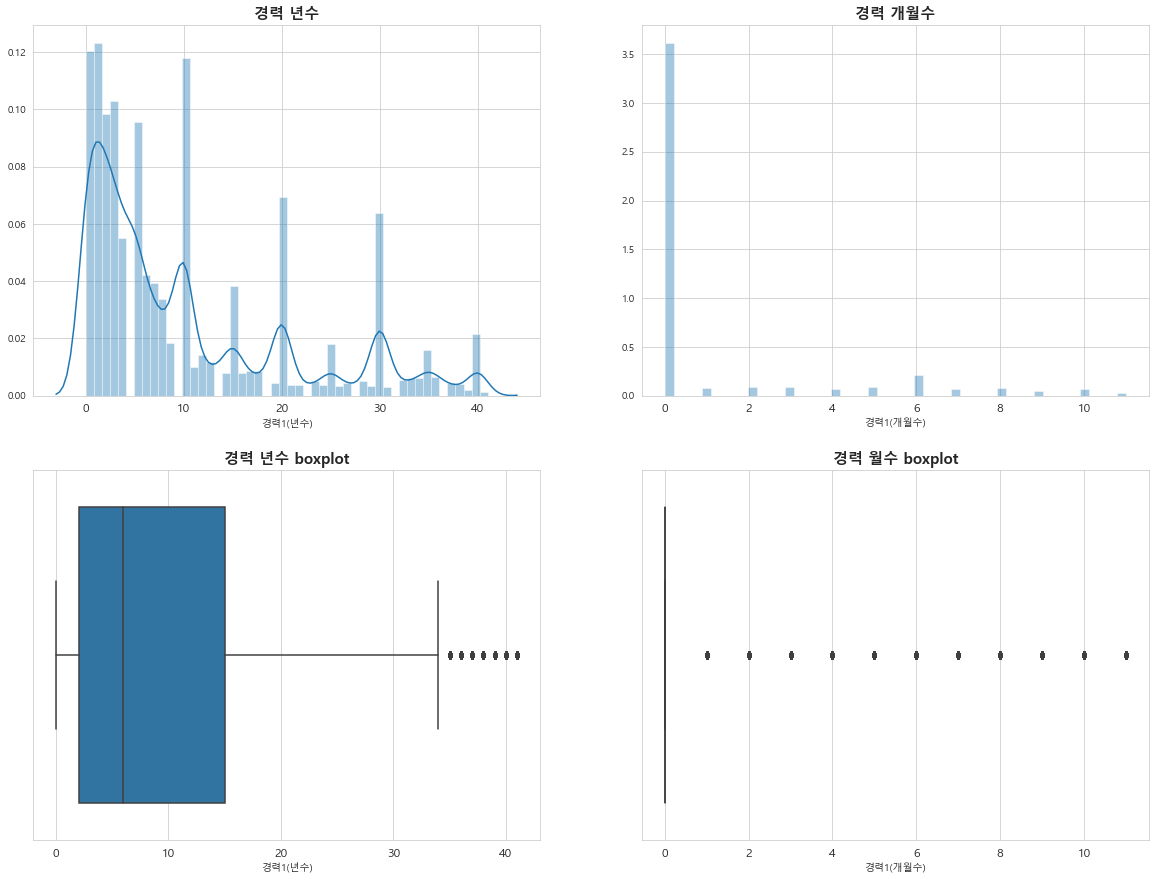

In [229]:
histo_box(sk60.dropna())

### 70대

In [230]:
sk70[['경력1(년수)','경력1(개월수)','경력건수']].describe()

,경력1(년수),경력1(개월수),경력건수
count,10309.000000,28095.000000,28095.000000
mean,6.706761,0.516960,0.406763
std,5.867213,1.852345,0.749920
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000
75%,10.000000,0.000000,1.000000
max,26.000000,11.000000,3.000000


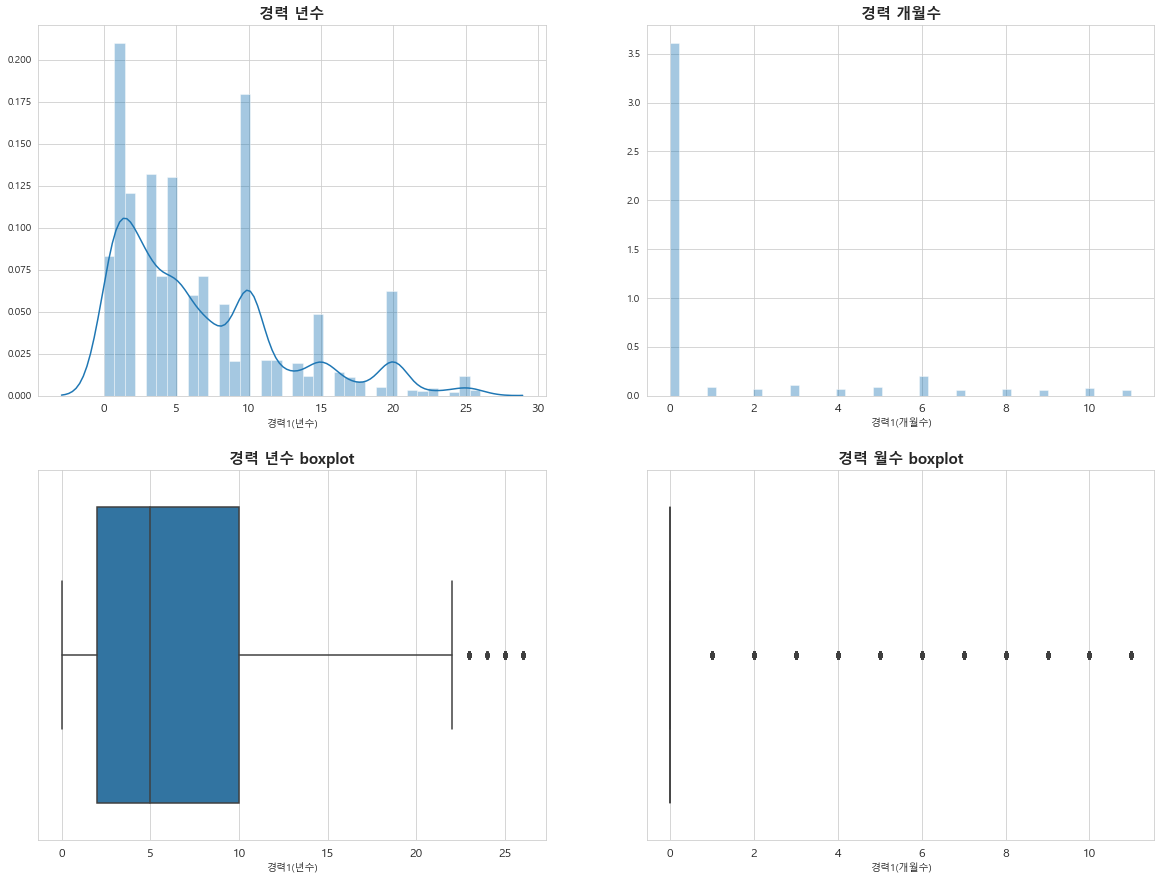

In [231]:
histo_box(sk70.dropna())

In [232]:
sk_df['나이'].value_counts()

20대    253156
50대    226153
30대    218846
40대    212406
60대    155697
70대     28095
10대     23844
그 외      3239
Name: 나이, dtype: int64

### 그 외

In [233]:
sk_df.loc[sk_df['나이'] == '그 외'][['경력1(년수)','경력1(개월수)','경력건수']]

,경력1(년수),경력1(개월수),경력건수
1318,3.0,NaN,0
2708,1.0,0.0,0
9684,0.0,0.0,1
10031,1.0,NaN,0
10032,NaN,NaN,0
...,...,...,...
1091628,10.0,0.0,3
1102854,NaN,NaN,0
1106662,2.0,NaN,0
1108353,NaN,NaN,0


In [234]:
sk_df.loc[sk_df['나이'] == '그 외'][['경력1(년수)','경력1(개월수)','경력건수']].isnull().sum() / sk_df.loc[sk_df['나이'] == '그 외'][['경력1(년수)','경력1(개월수)','경력건수']].shape[0]

경력1(년수)     0.897190
경력1(개월수)    0.928373
경력건수        0.000000
dtype: float64

대부분의 값이 null 값이므로 삭제하기로 결정

In [235]:
sk_df = sk_df.loc[sk_df['나이'] != '그 외']

In [236]:
sk_df.loc[(pd.isnull(sk_df['경력1(년수)']))&(sk_df['경력건수'] == 0)] = sk_df.loc[(pd.isnull(sk_df['경력1(년수)']))&(sk_df['경력건수'] == 0)].fillna({'경력1(년수)':0})

In [237]:
sk_df['경력1(개월수)'].fillna(0, inplace = True)

In [238]:
sk_df['경력1(개월수)'].isnull().sum()

0

In [239]:
sk_df.shape[0]

1118197

In [240]:
# 10대
sk10 = sk_df.loc[(sk_df['나이'] == '10대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk10['경력1(개월수)'] = sk10['경력1(개월수)'].fillna(0)

# 20대
sk20 = sk_df.loc[(sk_df['나이'] == '20대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk20['경력1(개월수)'] = sk20['경력1(개월수)'].fillna(0)

# 30대
sk30 = sk_df.loc[(sk_df['나이'] == '30대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk30['경력1(개월수)'] = sk30['경력1(개월수)'].fillna(0)

# 40대
sk40 = sk_df.loc[(sk_df['나이'] == '40대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk40['경력1(개월수)'] = sk40['경력1(개월수)'].fillna(0)

# 50대
sk50 = sk_df.loc[(sk_df['나이'] == '50대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk50['경력1(개월수)'] = sk50['경력1(개월수)'].fillna(0)

# 60대
sk60 = sk_df.loc[(sk_df['나이'] == '60대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk60['경력1(개월수)'] = sk60['경력1(개월수)'].fillna(0)

# 70대
sk70 = sk_df.loc[(sk_df['나이'] == '70대')][['경력1(년수)','경력1(개월수)','경력건수','취업유무']]
sk70['경력1(개월수)'] = sk70['경력1(개월수)'].fillna(0)

__정리__  

나이대별로 경력1(년수), 경력건수의 이상치 제거  

'그 외' 나이대는 대부분 결측치이므로 제거

### 경력과 경력건수 맞추기

In [241]:
sk_df[['경력건수','경력1(년수)']].isnull().sum()

경력건수            0
경력1(년수)    111336
dtype: int64

In [242]:
#sk_df.loc[sk_df['나이'] == '20대'][['경력건수','경력1(년수)']]

In [243]:
sk20.loc[(sk20['경력건수'] == 0)&(sk20['경력1(년수)'] != 0)]

,경력1(년수),경력1(개월수),경력건수,취업유무
268,3.0,0.0,0,N
299,4.0,6.0,0,N
349,2.0,0.0,0,N
1049,1.0,2.0,0,Y
1072,3.0,0.0,0,Y
...,...,...,...,...
1121305,3.0,6.0,0,N
1121415,6.0,0.0,0,N
1121421,2.0,1.0,0,Y
1121432,2.0,0.0,0,N


In [244]:
sk20.loc[(sk20['경력1(년수)'] == 1.0)&(sk20['경력건수'] != 0)]['경력건수'].value_counts()

1    3404
2    2925
3    2202
4    1480
5     838
6     475
Name: 경력건수, dtype: int64

In [245]:
def career_age(df):
    # 경력1(년수)와 경력건수가 0이 아닌경우 최빈값 산출
    dic = df.loc[(df['경력1(년수)'] != 0)&(df['경력건수'] != 0)].dropna().groupby('경력1(년수)')['경력건수'].agg(lambda x: x.value_counts().index[0]).to_dict()
    # 경력1(년수)가 0이 아닌데 경력건수가 0인 경우 최빈값으로 대체
    df.loc[(df['경력1(년수)'] != 0)&(df['경력건수'] == 0),'경력건수'] = df.loc[(df['경력1(년수)'] != 0)&(df['경력건수'] == 0)].dropna().apply(lambda x: dic[x['경력1(년수)']], axis = 1)
    # 경력1(년수)가 0인 경우 경력건수 0으로 대체
    df.loc[df['경력1(년수)'] == 0,'경력건수'] = 0
    # 나머지 결측치는 중앙값으로 대치
    career_count = df[['경력1(년수)','경력건수']].dropna().groupby('경력건수')['경력1(년수)'].median().to_dict()
    df.loc[pd.isnull(df['경력1(년수)']),'경력1(년수)'] = df.loc[pd.isnull(df['경력1(년수)'])].apply(lambda x: career_count[x['경력건수']], axis = 1)
    return df

__전체 바꾸기__

In [246]:
sk_df.loc[(sk_df['나이'] == '10대'),['경력1(년수)','경력건수']] = career_age(sk_df.loc[(sk_df['나이'] == '10대')][['경력1(년수)','경력건수']])
sk_df.loc[(sk_df['나이'] == '20대'),['경력1(년수)','경력건수']] = career_age(sk_df.loc[(sk_df['나이'] == '20대')][['경력1(년수)','경력건수']])
sk_df.loc[(sk_df['나이'] == '30대'),['경력1(년수)','경력건수']] = career_age(sk_df.loc[(sk_df['나이'] == '30대')][['경력1(년수)','경력건수']])
sk_df.loc[(sk_df['나이'] == '40대'),['경력1(년수)','경력건수']] = career_age(sk_df.loc[(sk_df['나이'] == '40대')][['경력1(년수)','경력건수']])
sk_df.loc[(sk_df['나이'] == '50대'),['경력1(년수)','경력건수']] = career_age(sk_df.loc[(sk_df['나이'] == '50대')][['경력1(년수)','경력건수']])
sk_df.loc[(sk_df['나이'] == '60대'),['경력1(년수)','경력건수']] = career_age(sk_df.loc[(sk_df['나이'] == '60대')][['경력1(년수)','경력건수']])
sk_df.loc[(sk_df['나이'] == '70대'),['경력1(년수)','경력건수']] = career_age(sk_df.loc[(sk_df['나이'] == '70대')][['경력1(년수)','경력건수']])

### 변환 후 나이대별 확인

__20대__

In [247]:
sk_df.loc[sk_df['나이'] == '20대'][['경력1(년수)','경력건수']].describe()

,경력1(년수),경력건수
count,253156.000000,253156.000000
mean,0.815288,0.817634
std,1.379131,1.365754
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,6.000000,6.000000


__30대__

In [248]:
sk_df.loc[sk_df['나이'] == '30대'][['경력1(년수)','경력건수']].describe()

,경력1(년수),경력건수
count,218846.000000,218846.000000
mean,4.177115,2.688333
std,4.052260,2.775981
min,0.000000,0.000000
25%,0.000000,0.000000
50%,4.000000,2.000000
75%,6.000000,4.000000
max,21.000000,15.000000


__40대__

In [249]:
sk_df.loc[sk_df['나이'] == '40대'][['경력1(년수)','경력건수']].describe()

,경력1(년수),경력건수
count,212406.000000,212406.000000
mean,5.994073,2.376675
std,6.068889,2.622958
min,0.000000,0.000000
25%,0.000000,0.000000
50%,5.000000,1.000000
75%,10.000000,4.000000
max,28.000000,12.000000


__50대__

In [250]:
sk_df.loc[sk_df['나이'] == '50대'][['경력1(년수)','경력건수']].describe()

,경력1(년수),경력건수
count,226153.000000,226153.000000
mean,7.564627,1.576663
std,8.790521,1.818789
min,0.000000,0.000000
25%,0.000000,0.000000
50%,5.000000,1.000000
75%,10.000000,2.000000
max,41.000000,9.000000


__60대__

In [251]:
sk_df.loc[sk_df['나이'] == '60대'][['경력1(년수)','경력건수']].describe()

,경력1(년수),경력건수
count,155697.000000,155697.000000
mean,7.922747,1.250557
std,9.835205,1.285953
min,0.000000,0.000000
25%,0.000000,0.000000
50%,5.000000,1.000000
75%,10.000000,1.000000
max,41.000000,6.000000


__70대__

In [252]:
sk_df.loc[sk_df['나이'] == '70대'][['경력1(년수)','경력건수']].describe()

,경력1(년수),경력건수
count,28095.000000,28095.000000
mean,2.967823,0.565759
std,4.798647,0.745415
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,5.000000,1.000000
max,26.000000,3.000000


__데이터 추출__

In [253]:
sk_df['최종학력'].value_counts()

고등학교          482134
대학교(4년제)      232960
대학교(2/3년제)    228704
중학교            96108
초등학교           54332
대학원(석사)        14630
무학              8195
대학원(박사)         1120
Name: 최종학력, dtype: int64

In [254]:
sk_df[['경력2(년수)','경력2(개월수)','경력3(년수)','경력3(개월수)']].isnull().sum() / sk_df[['경력2(년수)','경력2(개월수)','경력3(년수)','경력3(개월수)']].shape[0]

경력2(년수)     0.733745
경력2(개월수)    0.768678
경력3(년수)     0.845085
경력3(개월수)    0.855773
dtype: float64

In [255]:
sk_df[['경력2(년수)','경력2(개월수)','경력3(년수)','경력3(개월수)']].describe()

,경력2(년수),경력2(개월수),경력3(년수),경력3(개월수)
count,297726.000000,258664.000000,173226.000000,161274.000000
mean,3.423426,0.943780,1.657540,0.431985
std,6.126441,2.370338,4.558868,1.656056
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,0.000000,0.000000
max,85.000000,11.000000,50.000000,11.000000


In [256]:
sk_df[['경력1(년수)','경력1(개월수)']].describe()

,경력1(년수),경력1(개월수)
count,1.118197e+06,1.118197e+06
mean,4.848349e+00,1.034277e+00
std,6.909021e+00,2.502430e+00
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,2.000000e+00,0.000000e+00
75%,7.000000e+00,0.000000e+00
max,4.100000e+01,2.000000e+01


In [257]:
sk_df.shape[0]

1118197

In [258]:
sk_df.shape

(1118197, 53)

## 직종 분류 확인

In [259]:
class_t['대분류'].unique()

array(['경영·사무·금융·보험직', '연구직 및 공학 기술직', '교육·법률·사회복지·경찰·소방직 및 군인', '보건·의료직',
       '예술·디자인·방송·스포츠직', '미용·여행·숙박·음식·경비·청소직', '영업·판매·운전·운송직', '건설·채굴직',
       '설치·정비·생산직', '농림어업직'], dtype=object)

In [260]:
job_li = []
job_ex = []
for job in sk_df['희망직종1']:
    if job in class_t['세분류'].unique():
        job_li.append(job)
    else:
        job_ex.append(job)

In [261]:
len(sk_df['희망직종1'].unique())

1090

In [262]:
print(f'분류된 데이터 갯수 : {len(job_li)}개')
print(f'분류되지 않은 데이터 갯수 : {len(job_ex)}개\n')
print(f'분류된 직종 갯수 : {len(set(job_li))}개')
print(f'분류되지 않은 직종 갯수 : {len(set(job_ex))}개')

분류된 데이터 갯수 : 499506개
분류되지 않은 데이터 갯수 : 618691개

분류된 직종 갯수 : 366개
분류되지 않은 직종 갯수 : 724개


class0. '경영·사무·금융·보험직'  
class1. '연구직 및 공학 기술직'  
class2. '교육·법률·사회복지·경찰·소방직 및 군인'  
class3. '보건·의료직'  
class4. '예술·디자인·방송·스포츠직'  
class5. '미용·여행·숙박·음식·경비·청소직'  
class6. '영업·판매·운전·운송직'  
class7. '건설·채굴직'  
class8. '설치·정비·생산직'  
class9. '농림어업직'  

10개의 대분류로 분류

In [263]:
class0 = []; class1 = []; class2 = []; class3 = []; class4 = []; class5 = []; class6 = []
class7 = []; class8 = []; class9 = []
for job in set(job_ex):
    if ('사무원' in str(job)) or ('관리자' in str(job)) or ('기획자' in str(job)) or ('총무' in str(job)) \
        or ('행정조교' in str(job)) or ('군무원' in str(job)) or ('입력원' in str(job)) or ('신용 분석가' in str(job)) \
        or ('사무 보조원' in str(job)) or ('추심원' in str(job)) or ('원산지관리사' in str(job)) or ('HRD·교육·훈련 전문가' in str(job)) \
        or ('감정' in str(job)) or ('컨설턴트' in str(job)) or ('경영' in str(job)) or ('신용카드 모집인' in str(job)) \
        or ('마케팅' in str(job)) or ('머천다이저' in str(job)) or ('투자 권유 대행인' in str(job)) or ('속기사' in str(job)) \
        or ('수금원' in str(job)) or ('콜센터' in str(job)) or ('자료관리' in str(job)) or ('모니터 요원' in str(job)) \
        or ('병원 코디네이터' in str(job)) or ('펀드매니저' in str(job)) or ('전기관리원' in str(job)) \
        or ('현장소장' in str(job)) or ('현장반장' in str(job)) or ('취업 알선원' in str(job)) or ('통계' in str(job)) \
        or ('행정사' in str(job)) or ('보험 대리인' in str(job)) or ('창고 관리원' in str(job)) or ('부서장' in str(job)) \
        or ('도서 정리원' in str(job)) or ('창고 감시원' in str(job)):
        class0.append(job)
        
    if ('연구원' in str(job)) or ('개발자' in str(job)) or ('프로그래밍' in str(job)) \
        or ('프로그래머' in str(job)) or ('빅데이터' in str(job)) or ('제도사' in str(job)) \
        or ('기술자' in str(job)) or ('코더' in str(job)) or ('건축가' in str(job)) or ('IT' in str(job)) \
        or ('공장 전기관리원' in str(job)) or ('교통 계획' in str(job)) or ('네트워크' in str(job)) \
        or ('시험원' in str(job)) or ('위험물 관리원' in str(job)) or ('측량사' in str(job)) \
        or ('침해사고 대응 전문가' in str(job)) or ('정보보호 전문가' in str(job)) or ('지도제작' in str(job)) \
        or ('컴퓨터시스템 설계' in str(job)) or ('유리' in str(job)) or ('행사 진행원' in str(job)) or ('캐드캠' in str(job)) \
        or ('도시 계획' in str(job)):
        class1.append(job)
        
    if ('상담' in str(job)) or ('강사' in str(job)) or ('연구 조교' in str(job)) or ('교사' in str(job)) \
        or ('종교' in str(job)) or ('장교' in str(job)) or ('사회복지' in str(job)) or ('법률 전문가' in str(job)) \
        or ('장학관' in str(job)) or ('교육 전문가' in str(job)) or ('생활지도원' in str(job)) \
        or ('동화구연사' in str(job)) or ('복지시설 보조원' in str(job)) or ('보육시설 서비스 종사원' in str(job)):
        class2.append(job)
        
    if ('치료사' in str(job)) or ('간호사' in str(job)) or ('간호조무사' in str(job)) or ('구조사' in str(job)) \
        or ('수의사' in str(job)) or ('안전요원' in str(job)) or ('운동처방사' in str(job)) or ('의료 보조원' in str(job)) \
        or ('의지보조기기사' in str(job)) or ('의료 서비스' in str(job)):
        class3.append(job)
    
    if ('디자이너' in str(job)) or ('번역가' in str(job))  or ('통역가' in str(job)) or ('예술가' in str(job)) \
        or ('기자' in str(job)) or ('편집 기사' in str(job)) or ('레크리에이션' in str(job)) or ('만화가' in str(job)) \
        or ('작가' in str(job)) or ('방송연출' in str(job)) or ('아나운서' in str(job)) or ('사서' in str(job)) \
        or ('일러스트레이터' in str(job)) or ('골프장 캐디' in str(job)) or ('기록물 관리사' in str(job)) or ('훈련사' in str(job)) \
        or ('헬스' in str(job)) or ('카지노 딜러' in str(job)) or ('쇼핑호스트' in str(job)) or ('컨서베이터' in str(job)) \
        or ('학예사' in str(job)) or ('엑스트라' in str(job)) or ('컬러리스트' in str(job)) or ('응원단원' in str(job)) \
        or ('경주마 조련사' in str(job)) or ('행사 진행원' in str(job)) or ('무술사범' in str(job)):
        class4.append(job)
    
    if ('미화원' in str(job)) or ('청소원' in str(job)) or ('조리사' in str(job)) or ('서빙원' in str(job)) \
        or ('배달원' in str(job)) or ('안내원' in str(job)) or ('바텐터' in str(job)) or ('미용' in str(job)) \
        or ('서비스원' in str(job)) or ('경비원' in str(job)) or ('메이크업' in str(job)) \
        or ('가사도우미' in str(job)) or ('요양보호사' in str(job)) or ('간병인' in str(job)) or ('웨딩 플래너' in str(job)) \
        or ('주방장' in str(job)) or ('체형 관리사' in str(job)) or ('네일' in str(job)) or ('분장사' in str(job)) \
        or ('산후조리' in str(job)) or ('관리소장' in str(job)) or ('급식 보조원' in str(job)) or ('장의사' in str(job)) \
        or ('방역원' in str(job)) or ('환경 감시원' in str(job)) or ('주방 보조원' in str(job)) or ('보안' in str(job)) \
        or ('병원 배식원' in str(job)) or ('베이비시터' in str(job)) or ('폐기물 수거원' in str(job)) or ('웨이터' in str(job)) \
        or ('주차 단속원' in str(job)) or ('해설사' in str(job)) or ('기타 서비스' in str(job)) or ('식품 분야' in str(job)):
        class5.append(job)
        
    if ('판매' in str(job)) or ('운전' in str(job)) or ('영업원' in str(job)) or ('텔레마케터' in str(job)) \
        or ('계산원' in str(job)) or ('대여원' in str(job)) or ('택배원' in str(job)) or ('정산원' in str(job)) \
        or ('관제사' in str(job)) or ('가스 충전원' in str(job)) or ('운송' in str(job)) or ('나레이터' in str(job)) \
        or ('매장매니저' in str(job)) or ('이삿짐 운반원' in str(job)) or ('쇼핑몰택배 준비원' in str(job)) \
        or ('갑판원' in str(job)) or ('대여제품' in str(job)) or ('매장 정리원' in str(job)) or ('상품 진열원' in str(job)):
        class6.append(job)
        
    if ('채석원' in str(job)) or ('도장공' in str(job)) or ('배관공' in str(job)) or ('도배공' in str(job)) \
        or ('건축원' in str(job)) or ('시공원' in str(job)) or ('석재' in str(job)) or ('건축 마감 기능원' in str(job)) \
        or ('건물 보수원' in str(job)) or ('건설 기능원' in str(job)) or ('내장 목공' in str(job)) or ('형틀 목공' in str(job)) \
        or ('새시' in str(job)) or ('비계공' in str(job)) or ('철골공' in str(job)) or ('잠수부' in str(job)) \
        or ('외장 목공' in str(job)) or ('화약관리원' in str(job)):
        class7.append(job)
        
    if ('제조원' in str(job)) or ('수리원' in str(job)) or ('조작원' in str(job)) or ('정비원' in str(job)) \
        or ('조립' in str(job)) or ('설치원' in str(job)) or ('도축원' in str(job)) or ('판금원' in str(job)) \
        or ('재봉사' in str(job)) or ('용접원' in str(job)) or ('정육원' in str(job)) or ('주조원' in str(job)) \
        or ('주조' in str(job)) or ('금속가공' in str(job)) or ('금형제조 ' in str(job)) or ('자수원' in str(job)) \
        or ('식품 가공' in str(job)) or ('납땜' in str(job)) or ('전기공' in str(job)) or ('단조' in str(job)) \
        or ('배관' in str(job)) or ('사상원' in str(job)) or ('절단원' in str(job)) or ('자동차 튜닝' in str(job)) \
        or ('식품가공' in str(job)) or ('섬유·의복 분야' in str(job)) or ('제관' in str(job)) or ('판금기' in str(job)) \
        or ('인쇄' in str(job)) or ('화학·환경·에너지' in str(job)) or ('섬유가공' in str(job)) or ('가죽 기능원' in str(job)) \
        or ('전기·전자' in str(job)) or ('기계·금속' in str(job)):
        class8.append(job)
        
    if ('어업' in str(job)) or ('사육' in str(job)) or ('농업' in str(job)) or ('식물 관리' in str(job)) or ('조경' in str(job)) \
        or ('산불감시원' in str(job)):
        class9.append(job)

In [264]:
job_set = (set(job_ex) - set(class0) - set(class1) - set(class2) - set(class3) - set(class4) - set(class5)
   - set(class6) - set(class7) - set(class8) - set(class9))
len(job_set)

1

In [265]:
class0.extend(class_t.loc[class_t['대분류코드'] == 0]['세분류'].to_list())
class1.extend(class_t.loc[class_t['대분류코드'] == 1]['세분류'].to_list())
class2.extend(class_t.loc[class_t['대분류코드'] == 2]['세분류'].to_list())
class3.extend(class_t.loc[class_t['대분류코드'] == 3]['세분류'].to_list())
class4.extend(class_t.loc[class_t['대분류코드'] == 4]['세분류'].to_list())
class5.extend(class_t.loc[class_t['대분류코드'] == 5]['세분류'].to_list())
class6.extend(class_t.loc[class_t['대분류코드'] == 6]['세분류'].to_list())
class7.extend(class_t.loc[class_t['대분류코드'] == 7]['세분류'].to_list())
class8.extend(class_t.loc[class_t['대분류코드'] == 8]['세분류'].to_list())
class9.extend(class_t.loc[class_t['대분류코드'] == 9]['세분류'].to_list())

In [266]:
#class_dic = {0 : class0, 1 : class1, 2 : class2, 3 : class3, 4 : class4, 5 : class5, 6 : class6,
#            7 : class7, 8 : class8, 9 : class9}

In [137]:
#hj = sk_df['희망직종1']

In [267]:
# 대분류별 범주로 변환
def replace_job(job):
    
    if job in class0:
        return 0
    
    elif job in class1:
        return 1
    
    elif job in class2:
        return 2
    
    elif job in class3:
        return 3
    
    elif job in class4:
        return 4
    
    elif job in class5:
        return 5
    
    elif job in class6:
        return 6
    
    elif job in class7:
        return 7
    
    elif job in class8:
        return 8
    
    elif job in class9:
        return 9

In [268]:
sk_df['희망직종1'] = sk_df['희망직종1'].map(lambda x: replace_job(x))

## 희망근무지역1

In [269]:
sk_df['희망근무지역1'].unique()

array(['충남 아산시', nan, '인천 중구', '인천', '대전', '인천 남동구', '지역무관', '인천 서구',
       '서울', '인천 부평구', '인천 계양구', '서울 금천구', '경기 수원시', '경기 부천시', '경북 포항시',
       '경기 의왕시', '대구', '경기 광명시', '경기', '경기 김포시', '부산', '서울 노원구', '인천 연수구',
       '인천 동구', '경기 안양시', '서울 은평구', '경북 경주시', '서울 구로구', '전북 전주시',
       '경기 안성시', '경북 포항시 남구', '서울 강동구', '충남 천안시', '서울 강남구', '경기 용인시 처인구',
       '전북 익산시', '서울 송파구', '경기 안산시 단원구', '서울 성동구', '제주 서귀포시', '인천 강화군',
       '경기 시흥시', '경기 안산시', '대전 유성구', '경기 남양주시', '경남 창원시', '서울 강서구',
       '충남 당진시', '경기 성남시 분당구', '강원 홍천군', '경기 포천시', '전북 군산시', '경기 의정부시',
       '경기 이천시', '충남 서산시', '충남', '경기 고양시', '강원', '경기 평택시', '서울 마포구',
       '충북 청주시', '인천 옹진군', '부산 해운대구', '서울 관악구', '전북', '경기 고양시 일산서구',
       '경기 성남시', '서울 양천구', '경기 과천시', '전북 고창군', '충남 계룡시', '경기 광주시',
       '경기 구리시', '울산', '서울 서초구', '서울 서대문구', '서울 동작구', '경북 구미시', '경기 양주시',
       '강원 태백시', '서울 영등포구', '울산 남구', '서울 광진구', '세종', '서울 강북구', '경기 파주시',
       '경기 고양시 일산동구', '강원 춘천시', '부산 중구', '경남 진주시', '충북 청주시 청원구', '전남 곡성군',
   

In [143]:
# 제일 큰 단위 지역으로 파악
sk_df['희망근무지역1'].map(lambda x: str(x).split(' ')[0]).value_counts()

인천      931329
서울       88424
경기       38337
지역무관     29911
nan      15329
충남        2325
강원        1681
부산        1663
전북        1250
충북        1169
경북        1079
경남         989
대전         874
대구         834
전남         712
광주         699
제주         556
울산         487
재택근무       379
세종         170
Name: 희망근무지역1, dtype: int64

In [270]:
# 제일 큰 지역으로 통일하기 위함
sk_df['희망근무지역'] = sk_df['희망근무지역1'].map(lambda x: str(x).split(' ')[0])

In [271]:
# 인천, 서울경기, 비수도권으로 재분류
def region4(x):
    if (x != '서울')&(x != '경기')&(x != '인천'):
        return '비수도권'
    
    elif (x == '인천'):
        return x
    
    else:
        return '서울경기'

In [272]:
sk_df['희망근무지역'] = sk_df['희망근무지역'].map(region4)

In [273]:
sk_df['희망근무지역'].value_counts()

인천      931329
서울경기    126761
비수도권     60107
Name: 희망근무지역, dtype: int64

## 주소

In [277]:
# 주소를 구단위까지 뽑음
sk_df['주소'] = sk_df['주소'].map(lambda x: ' '.join(str(x).split(' ')[:2]).strip())

## 고용형태

In [161]:
# 결측치 파악
sk_df['고용형태(파견근로여부)'].isnull().sum() / sk_df.shape[0]

0.5772596420845343

In [162]:
sk_df['고용형태(파견근로여부)'].value_counts()

N    456974
Y     15733
Name: 고용형태(파견근로여부), dtype: int64

In [163]:
# 결측치를 N으로 대치
sk_df['고용형태(파견근로여부)'].fillna('N', inplace = True)

## 희망급여 & 희망급여형태

In [278]:
pd.options.display.float_format = '{:.5f}'.format
sk_df['희망급여'].describe().to_frame()

,희망급여
count,1118197.00000
mean,8671467.57061
std,13364317.46095
min,0.00000
25%,1300000.00000
50%,1800000.00000
75%,18000000.00000
max,215430000.00000


In [279]:
sk_df['희망급여형태'].value_counts().to_frame()

,희망급여형태
월급,576580
연봉,296237
시급,160791
일급,11310
임금유형(상용),87


In [280]:
sk_df.groupby('희망급여형태')['희망급여'].describe().transpose()[['연봉','월급','일급','시급','임금유형(상용)']]

희망급여형태,연봉,월급,일급,시급,임금유형(상용)
count,296237.00000,576580.00000,11310.00000,160791.00000,87.00000
mean,28983606.87558,1920978.40716,133338.00345,8000.94382,0.00000
std,10471770.80855,757874.92918,58716.62670,2975.21327,0.00000
min,0.00000,0.00000,0.00000,0.00000,0.00000
25%,22000000.00000,1500000.00000,90250.00000,6470.00000,0.00000
50%,26000000.00000,1800000.00000,150000.00000,7530.00000,0.00000
75%,32000000.00000,2000000.00000,180000.00000,8500.00000,0.00000
max,215430000.00000,202500000.00000,680000.00000,85900.00000,0.00000


In [281]:
sk_df[['희망급여형태','희망급여']].isnull().sum() / sk_df.shape[0]

희망급여형태   0.06546
희망급여     0.00000
dtype: float64

In [282]:
cash = sk_df[['희망급여형태','희망급여']].copy()

In [283]:
cash.groupby('희망급여형태')['희망급여'].describe().transpose()[['연봉','월급','일급','시급','임금유형(상용)']]

희망급여형태,연봉,월급,일급,시급,임금유형(상용)
count,296237.00000,576580.00000,11310.00000,160791.00000,87.00000
mean,28983606.87558,1920978.40716,133338.00345,8000.94382,0.00000
std,10471770.80855,757874.92918,58716.62670,2975.21327,0.00000
min,0.00000,0.00000,0.00000,0.00000,0.00000
25%,22000000.00000,1500000.00000,90250.00000,6470.00000,0.00000
50%,26000000.00000,1800000.00000,150000.00000,7530.00000,0.00000
75%,32000000.00000,2000000.00000,180000.00000,8500.00000,0.00000
max,215430000.00000,202500000.00000,680000.00000,85900.00000,0.00000


In [284]:
sk_df.loc[sk_df['희망급여'] == 0].shape[0]

74642

희망급여가 0인 경우 발견

In [285]:
# 희망급여의 histogram, boxplot 확인
def histo_box2(data):
    fig, ax = plt.subplots(1,2, figsize = (15,8))

    sns.distplot(data['희망급여'], ax = ax[0])
    ax[0].set_title('희망급여', fontsize = 30, fontweight = 'bold')
    ax[0].tick_params(axis="x", labelsize = 15)

    sns.boxplot(x = '희망급여', data = data, ax = ax[1])
    ax[1].set_title('희망급여 boxplot', fontsize = 30, fontweight = 'bold')
    ax[1].tick_params(axis = 'x', labelsize = 15)
    
    #plt.savefig(f'../fig/{title}.png', bbox_inches='tight')
    fig.show()

In [286]:
# 그래프 파악을 위한 표준화
scaler = StandardScaler()
cash_y = scaler.fit_transform(cash.loc[cash['희망급여형태']=='연봉','희망급여'].dropna().values.reshape(-1,1))
cash_m = scaler.fit_transform(cash.loc[cash['희망급여형태']=='월급','희망급여'].dropna().values.reshape(-1,1))
cash_d = scaler.fit_transform(cash.loc[cash['희망급여형태']=='일급','희망급여'].dropna().values.reshape(-1,1))
cash_h = scaler.fit_transform(cash.loc[cash['희망급여형태']=='시급','희망급여'].dropna().values.reshape(-1,1))

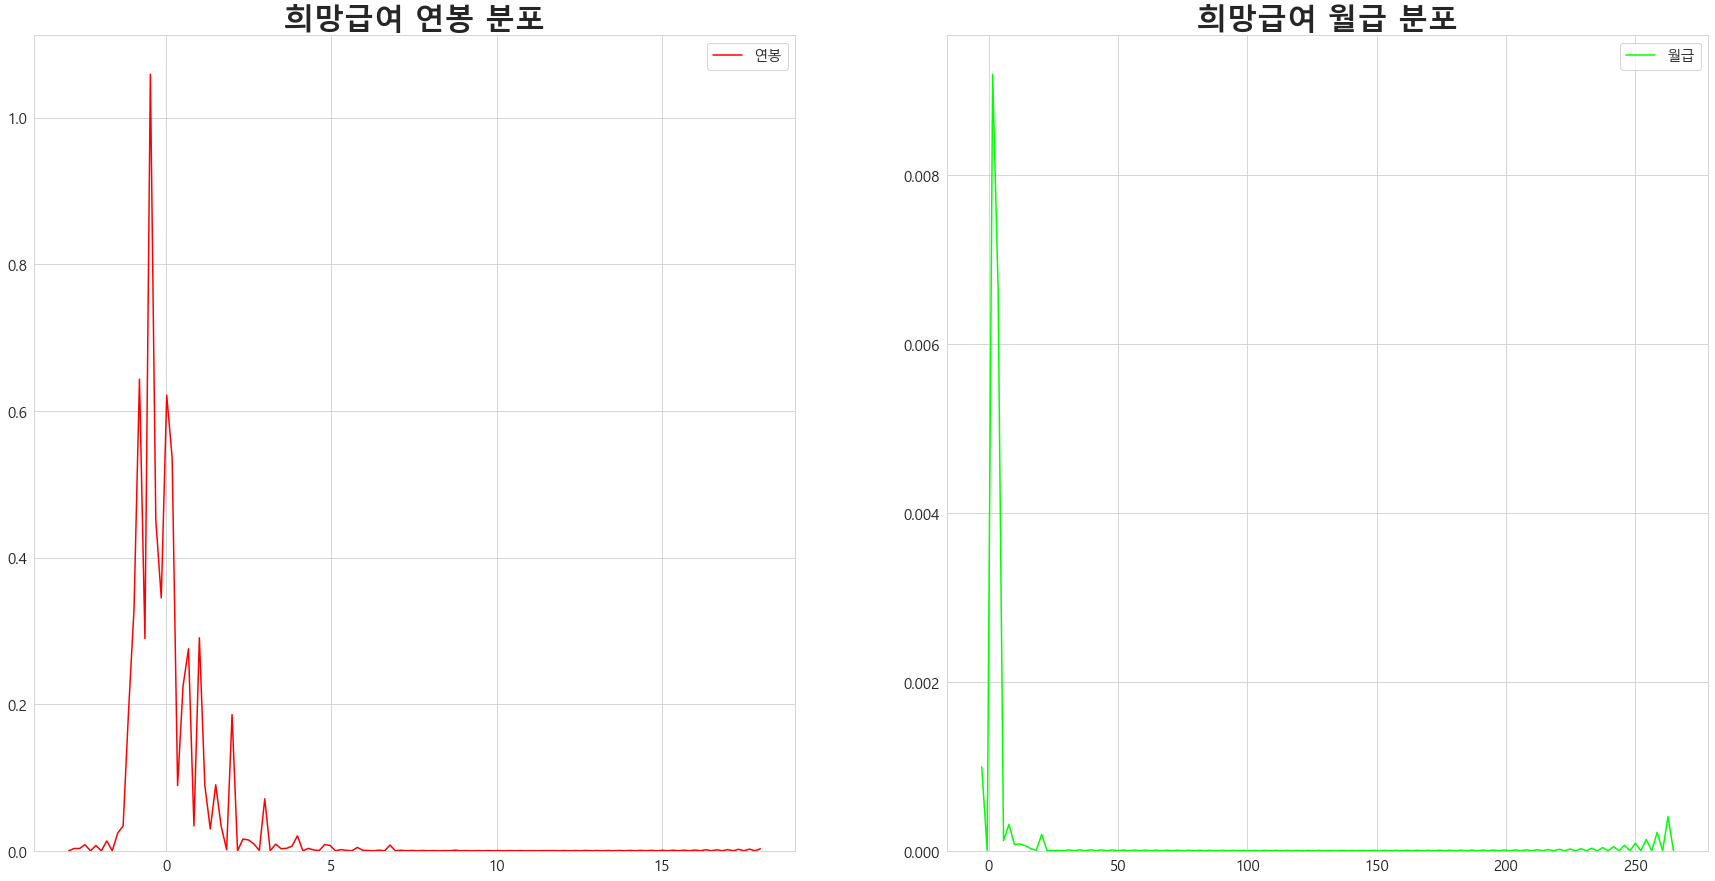

In [287]:
fig, ax = plt.subplots(1,2, figsize = (30,15))
sns.distplot(cash_y, hist=False, color = '#ff0000', label = '연봉', ax = ax[0])
ax[0].set_title('희망급여 연봉 분포', fontsize = 30, fontweight = 'bold')
ax[0].tick_params(axis = 'x', labelsize = 15)
ax[0].tick_params(axis = 'y', labelsize = 15)
ax[0].legend(fontsize = 'x-large')
sns.distplot(cash_m, hist=False, color = '#00ff00', label = '월급', ax = ax[1])
ax[1].set_title('희망급여 월급 분포', fontsize = 30, fontweight = 'bold')
ax[1].tick_params(axis = 'x', labelsize = 15)
ax[1].tick_params(axis = 'y', labelsize = 15)
ax[1].legend(fontsize = 'x-large')
#sns.distplot(cash_d, hist=False, ax = ax, color = '#0000ff', label = '일급', ax = ax[1,0])
#ax[1,0].set_title('희망급여 일급 분포', fontsize = 30, fontweight = 'bold')
#sns.distplot(cash_h, hist=False, ax = ax, color = '#003366', label = '시급', ax = ax[1,1])
#plt.title('희망급여 이상치 파악', fontsize = 30, fontweight = 'bold')

plt.savefig('../fig/희망급여 이상치 파악.png', bbox_inches='tight')
plt.show()

다른 월급 형태도 이상치가 있어보이지만 월급이 심해보임.

In [288]:
sk_df.loc[sk_df['희망급여'] == 0,'희망급여형태'].isnull().sum() / sk_df.loc[sk_df['희망급여'] == 0,'희망급여형태'].shape[0]

0.9804131722086761

In [289]:
sk_df = sk_df.drop(sk_df.loc[sk_df['희망급여'] == 0,'희망급여형태'].index, axis = 0)

In [290]:
cash = sk_df[['희망급여형태','희망급여']].copy()

__아래부터는 상,하위 5% 그래프를 통해 이상치 파악 후 제거__

### 연봉

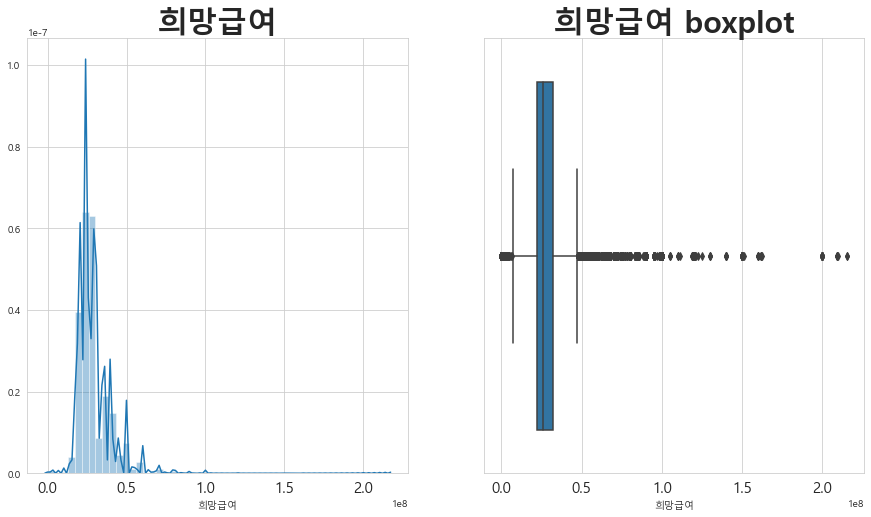

In [291]:
histo_box2(cash.loc[cash['희망급여형태'] == '연봉'].dropna())

In [292]:
#detect_outliers(cash.loc[cash['희망급여형태'] == '연봉'].dropna(), '희망급여')

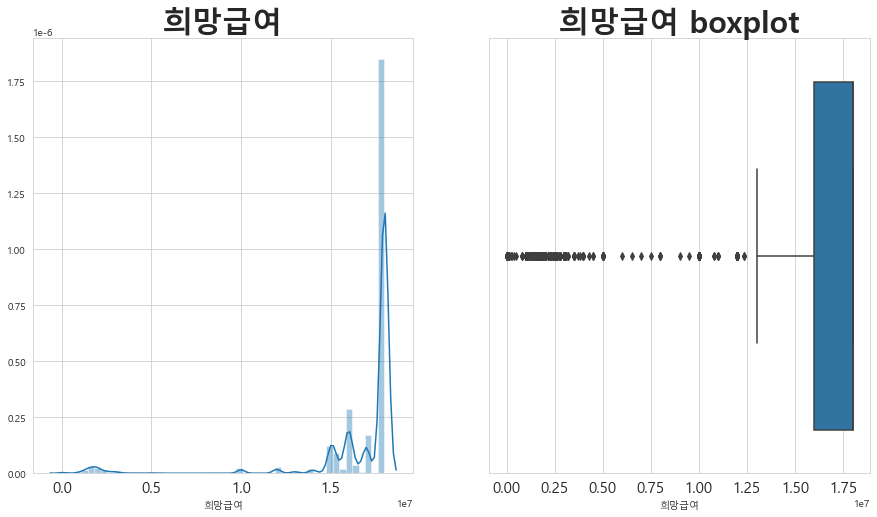

In [293]:
p5 = np.percentile(cash.loc[cash['희망급여형태'] == '연봉','희망급여'].dropna(), 5)
histo_box2(cash.loc[(cash['희망급여형태'] == '연봉')&(cash['희망급여'] <= p5)].dropna())

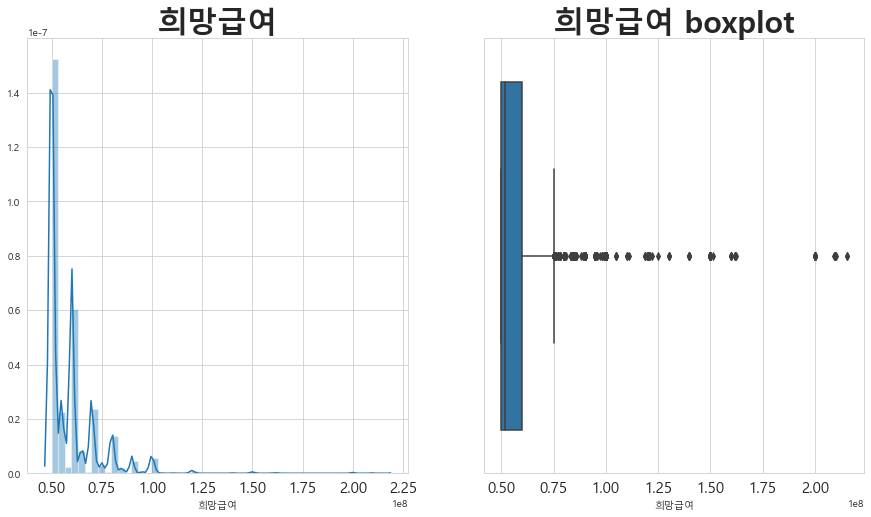

In [294]:
p5 = np.percentile(cash.loc[cash['희망급여형태'] == '연봉','희망급여'].dropna(), 95)
histo_box2(cash.loc[(cash['희망급여형태'] == '연봉')&(cash['희망급여'] >= p5)].dropna())

과연 연봉 1억을 원하는 사람이 워크넷을 사용할까 ?

In [295]:
sk_df = sk_df.drop(sk_df.loc[(sk_df['희망급여형태'] == '연봉')&((sk_df['희망급여'] <= 15000000)|(sk_df['희망급여'] >= 100000000))].index, axis = 0)
cash = sk_df[['희망급여형태','희망급여']].copy()

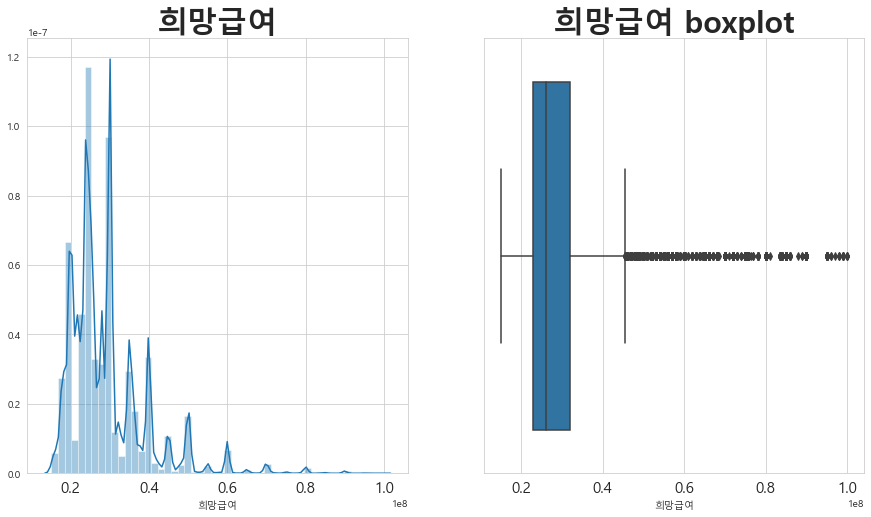

In [296]:
histo_box2(cash.loc[cash['희망급여형태'] == '연봉'].dropna())

### 월급

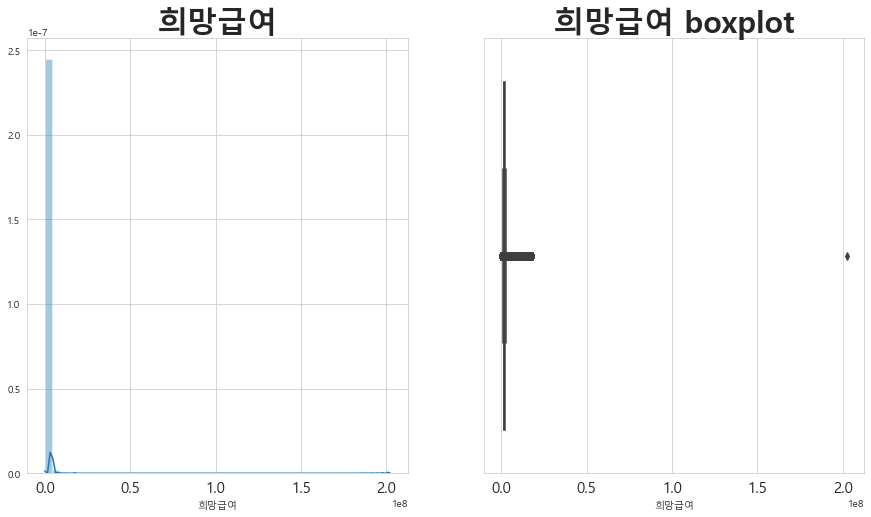

In [297]:
histo_box2(cash.loc[cash['희망급여형태'] == '월급'].dropna())

In [298]:
detect_outliers(cash.loc[cash['희망급여형태'] == '월급'].dropna(), '희망급여')

,희망급여형태,희망급여
13,월급,3000000
136,월급,3000000
170,월급,3000000
175,월급,3000000
177,월급,3000000
...,...,...
1121389,월급,4300000
1121397,월급,3500000
1121402,월급,4000000
1121412,월급,3000000


In [299]:
cash.loc[cash['희망급여형태'] == '월급'].sort_values(ascending = False, by = '희망급여')

,희망급여형태,희망급여
714660,월급,202500000
981413,월급,17950000
1043712,월급,17950000
986025,월급,17950000
1054314,월급,17950000
...,...,...
1107124,월급,10000
1022376,월급,10000
187089,월급,10000
242400,월급,10000


In [300]:
cash = cash.drop(714660,axis = 0).copy()

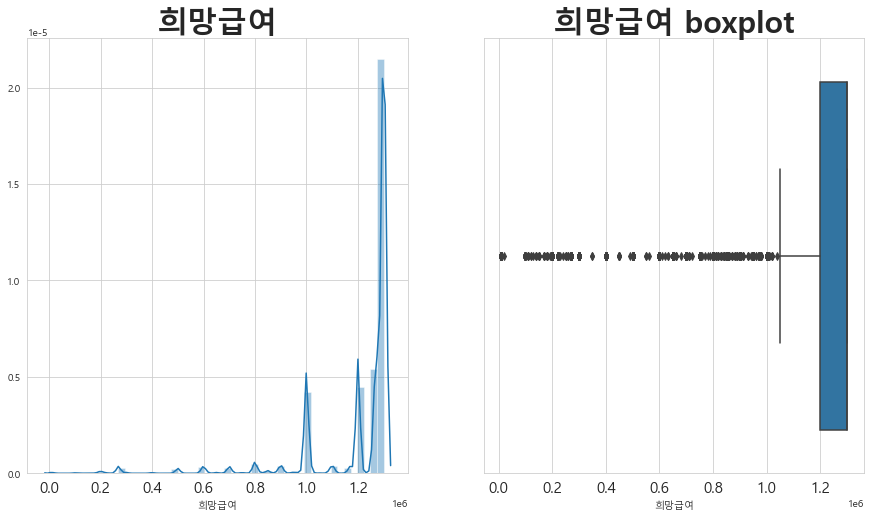

In [301]:
p5 = np.percentile(cash.loc[cash['희망급여형태'] == '월급','희망급여'].dropna(), 5)
histo_box2(cash.loc[(cash['희망급여형태'] == '월급')&(cash['희망급여'] <= p5)].dropna())

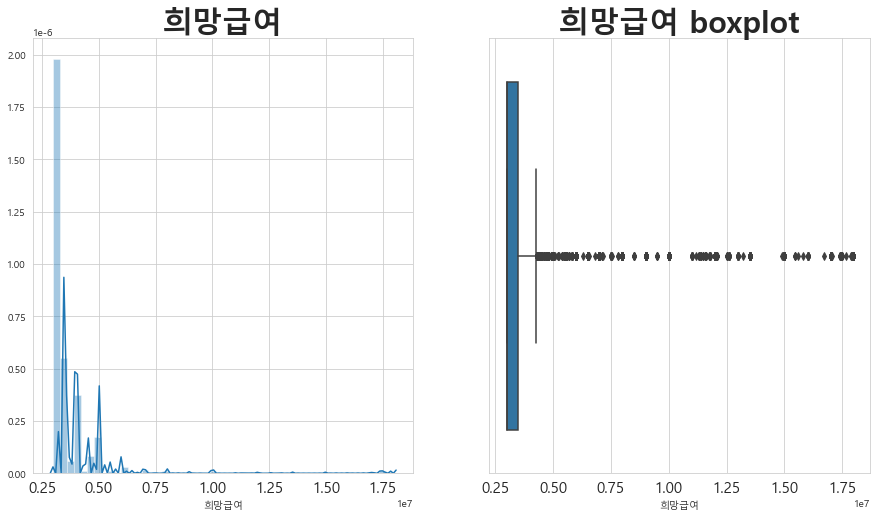

In [302]:
p5 = np.percentile(cash.loc[cash['희망급여형태'] == '월급','희망급여'].dropna(), 95)
histo_box2(cash.loc[(cash['희망급여형태'] == '월급')&(cash['희망급여'] >= p5)].dropna())

In [303]:
sk_df = sk_df.drop(sk_df.loc[(sk_df['희망급여형태'] == '월급')&((sk_df['희망급여'] <= 1000000)|(sk_df['희망급여'] >= 10000000))].index, axis = 0)
cash = sk_df[['희망급여형태','희망급여']].copy()

In [304]:
sk_df.loc[sk_df['희망급여형태'] == '월급', '희망급여'].max()

9990000

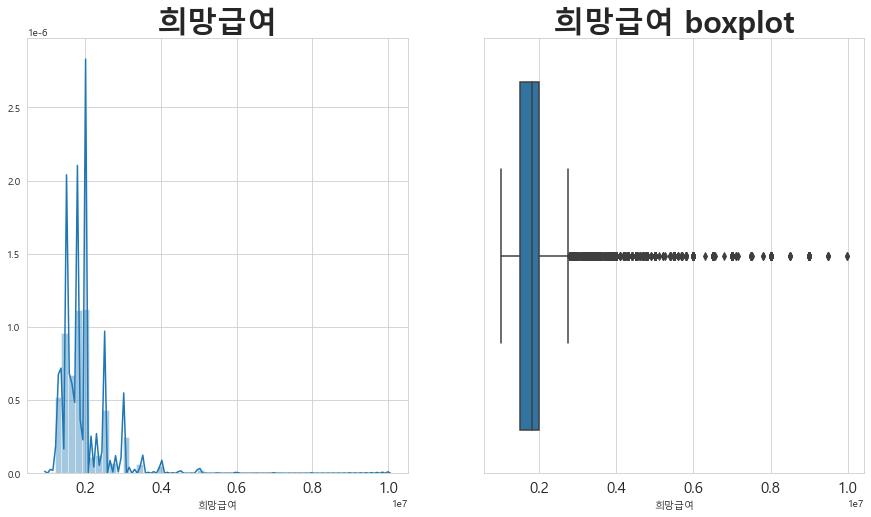

In [305]:
histo_box2(cash.loc[cash['희망급여형태'] == '월급'].dropna())

### 일급

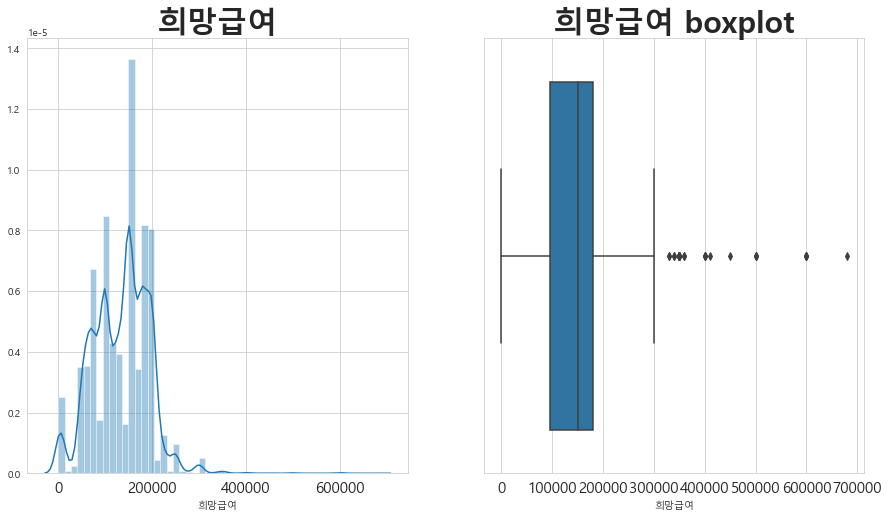

In [306]:
histo_box2(cash.loc[cash['희망급여형태'] == '일급'].dropna())

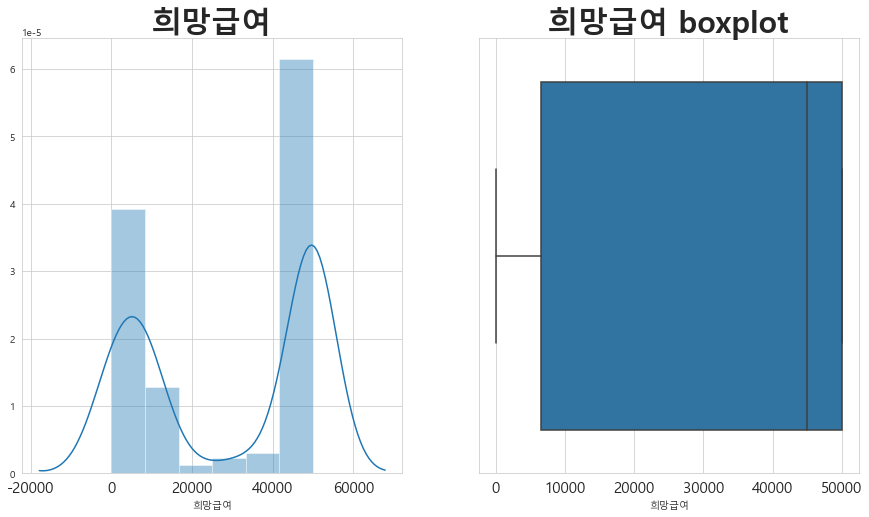

In [307]:
p5 = np.percentile(cash.loc[cash['희망급여형태'] == '일급','희망급여'].dropna(), 5)
histo_box2(cash.loc[(cash['희망급여형태'] == '일급')&(cash['희망급여'] <= p5)].dropna())

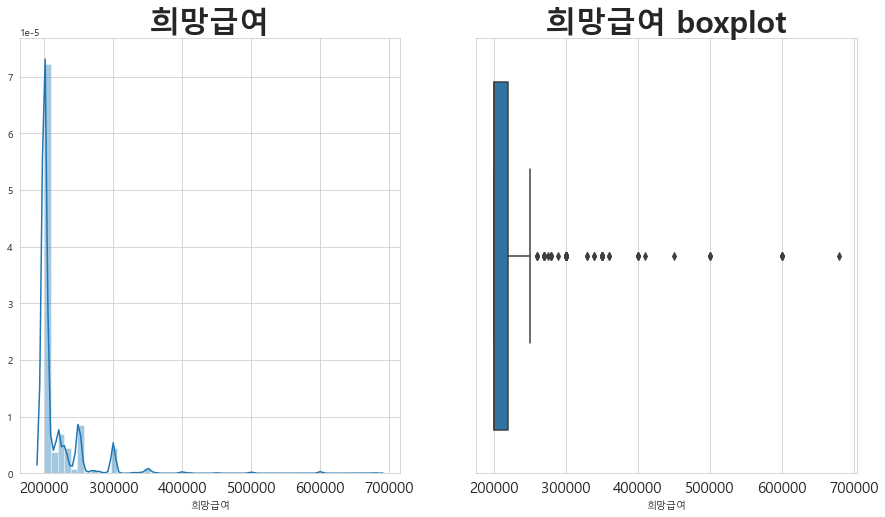

In [308]:
p5 = np.percentile(cash.loc[cash['희망급여형태'] == '일급','희망급여'].dropna(), 95)
histo_box2(cash.loc[(cash['희망급여형태'] == '일급')&(cash['희망급여'] >= p5)].dropna())

In [309]:
sk_df = sk_df.drop(sk_df.loc[(sk_df['희망급여형태'] == '일급')&((sk_df['희망급여'] < 48240)|(sk_df['희망급여'] >= 300000))].index, axis = 0)
cash = sk_df[['희망급여형태','희망급여']].copy()

2016년 일 8시간 * 최저시간 기준으로 미만값 제거

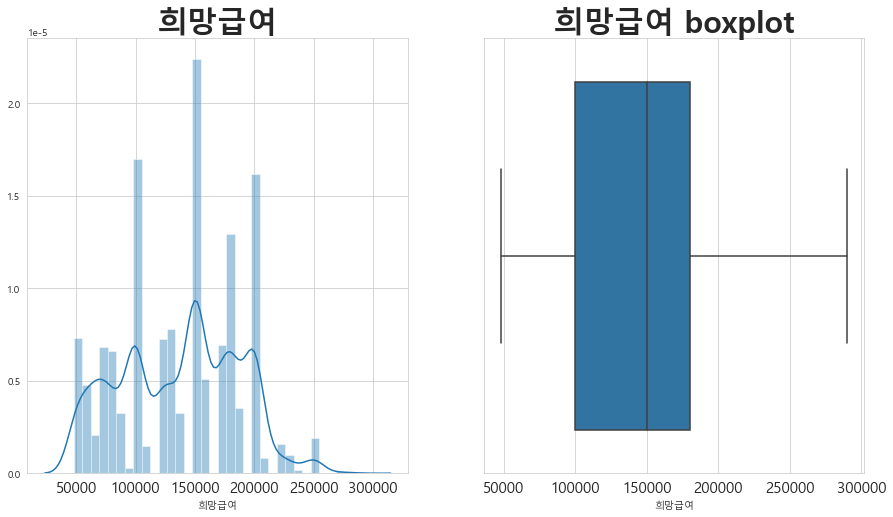

In [310]:
histo_box2(cash.loc[cash['희망급여형태'] == '일급'].dropna())

### 시급

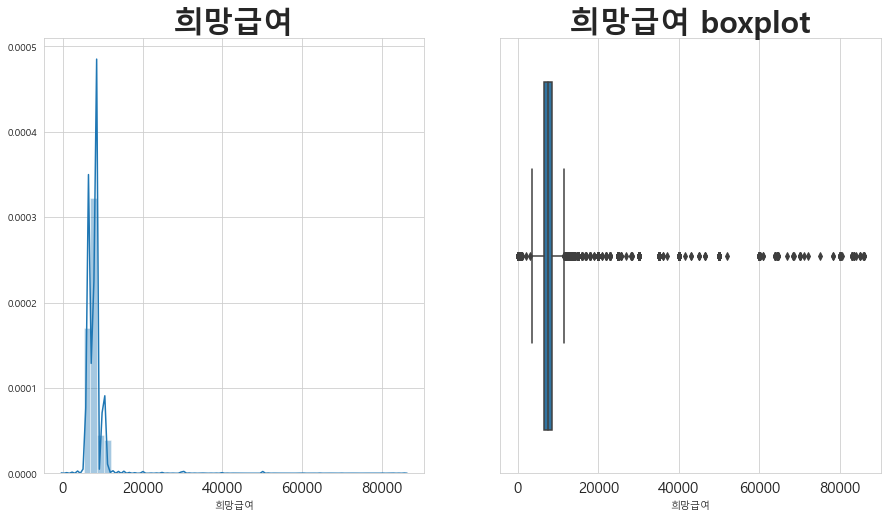

In [311]:
histo_box2(cash.loc[cash['희망급여형태'] == '시급'].dropna())

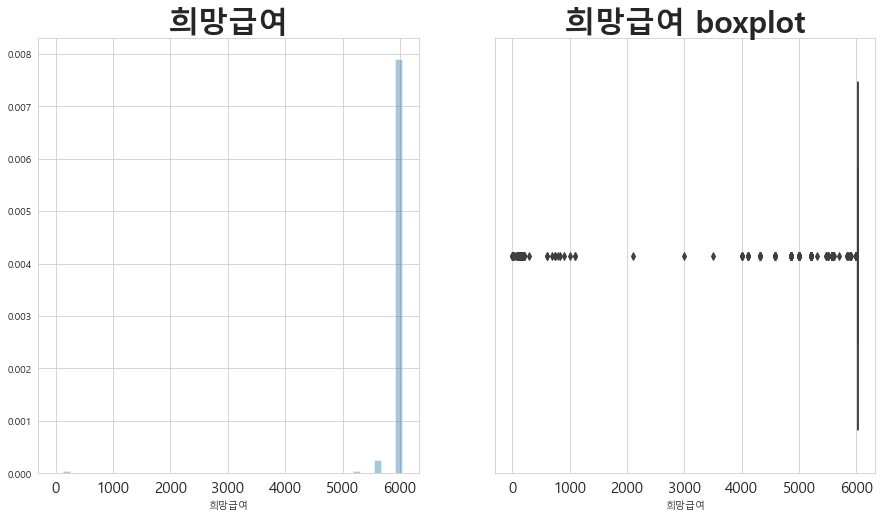

In [312]:
p5 = np.percentile(cash.loc[cash['희망급여형태'] == '시급','희망급여'].dropna(), 5)
histo_box2(cash.loc[(cash['희망급여형태'] == '시급')&(cash['희망급여'] <= p5)].dropna())

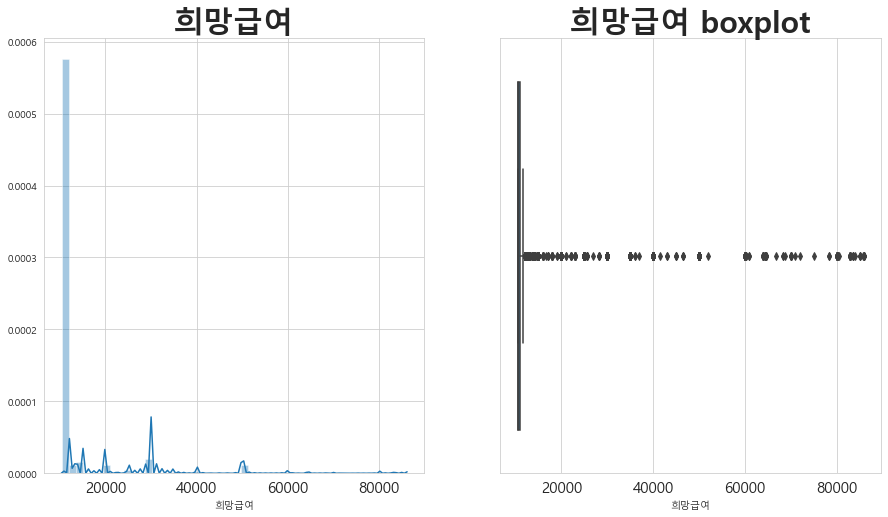

In [313]:
p5 = np.percentile(cash.loc[cash['희망급여형태'] == '시급','희망급여'].dropna(), 95)
histo_box2(cash.loc[(cash['희망급여형태'] == '시급')&(cash['희망급여'] >= p5)].dropna())

In [314]:
sk_df = sk_df.dropna(subset = ['희망급여형태'])

In [315]:
sk_df = sk_df.drop(sk_df.loc[(sk_df['희망급여형태'] == '시급')&(sk_df['희망급여'] < 6030)].index, axis = 0)
cash = sk_df[['희망급여형태','희망급여']].copy()

2016년 최저시급 6030원 기준으로 제거

### 최종 분포 확인

In [316]:
# 그래프 파악을 위한 표준화
scaler = StandardScaler()
sk_df_y = scaler.fit_transform(sk_df.loc[sk_df['희망급여형태']=='연봉','희망급여'].dropna().values.reshape(-1,1))
sk_df_m = scaler.fit_transform(sk_df.loc[sk_df['희망급여형태']=='월급','희망급여'].dropna().values.reshape(-1,1))
sk_df_d = scaler.fit_transform(sk_df.loc[sk_df['희망급여형태']=='일급','희망급여'].dropna().values.reshape(-1,1))
sk_df_h = scaler.fit_transform(sk_df.loc[sk_df['희망급여형태']=='시급','희망급여'].dropna().values.reshape(-1,1))

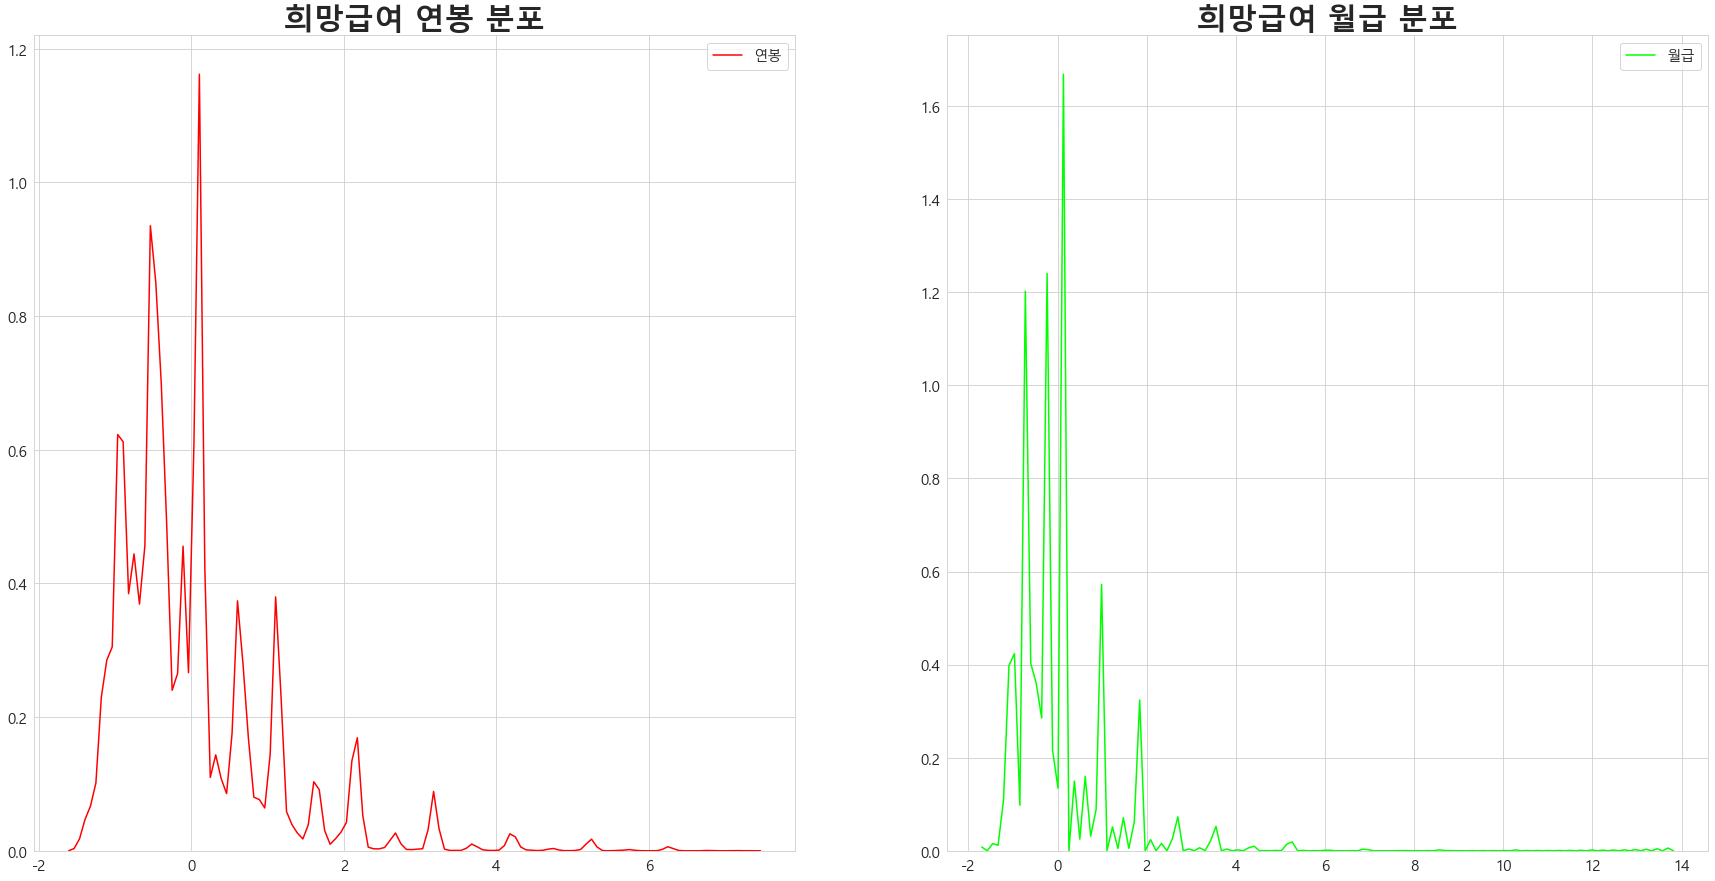

In [317]:
fig, ax = plt.subplots(1,2, figsize = (30,15))
sns.distplot(sk_df_y, hist=False, ax = ax[0], color = '#ff0000', label = '연봉')
ax[0].set_title('희망급여 연봉 분포', fontsize = 30, fontweight = 'bold')
ax[0].tick_params(axis = 'x', labelsize = 15)
ax[0].tick_params(axis = 'y', labelsize = 15)
ax[0].legend(fontsize = 'x-large')
sns.distplot(sk_df_m, hist=False, ax = ax[1], color = '#00ff00', label = '월급')
ax[1].set_title('희망급여 월급 분포', fontsize = 30, fontweight = 'bold')
ax[1].tick_params(axis = 'x', labelsize = 15)
ax[1].tick_params(axis = 'y', labelsize = 15)
ax[1].legend(fontsize = 'x-large')
plt.savefig('../fig/희망급여 분포.png', bbox_inches='tight')
plt.show()

In [318]:
sk_df.groupby('희망급여형태')['희망급여'].describe().transpose()[['연봉','월급','일급','시급']]

희망급여형태,연봉,월급,일급,시급
count,292983.00000,566397.00000,10726.00000,159591.00000
mean,29068784.19567,1928526.40462,136794.51613,8025.26817
std,9737285.62453,589455.46533,49628.10551,2968.43552
min,15130000.00000,1010000.00000,48240.00000,6030.00000
25%,23000000.00000,1500000.00000,100000.00000,6470.00000
50%,26000000.00000,1800000.00000,150000.00000,7600.00000
75%,32000000.00000,2000000.00000,180000.00000,8500.00000
max,99990000.00000,9990000.00000,290000.00000,85900.00000


In [326]:
del sk_df['행번호']

In [215]:
#sk_df.to_csv('../data/워크넷/구직자_전처리.csv', encoding = 'cp949', index = False)
#sk_df.iloc[:514848,:].to_csv('../data/워크넷/구직자_전처리1.csv', encoding = 'cp949', index = False)
#sk_df.iloc[514848:,:].to_csv('../data/워크넷/구직자_전처리2.csv', encoding = 'cp949', index = False)

In [328]:
sk_df.shape

(1029697, 53)

# 경력 통합 전처리

In [330]:
# 경력 관련 열만 추출

sk_career = sk_df[["경력1(년수)", "경력1(개월수)"]].copy()
sk_career.head()

,경력1(년수),경력1(개월수)
0,11.00000,0.00000
1,10.00000,0.00000
2,10.00000,0.00000
3,8.00000,0.00000
4,0.00000,0.00000


In [332]:
# 경력 결측치 0으로 대체

sk_career = sk_career.fillna(0)

In [333]:
# 경력1(년수)와 합치기 위해 1년 단위로 개월수를 변환
sk_career['경력1(개월수)'] = (sk_career['경력1(개월수)'] / 12)

In [334]:
# 경력을 년수로 통일
sk_df['전체경력기간'] = (sk_career['경력1(년수)'].round(2) + sk_career['경력1(개월수)'].round(2))

# 문자형 데이터 범주형 데이터로 변환

In [337]:
sk_col = sk_df.columns.tolist()

In [336]:
# Y = 1 , N = 0 으로 대체

for i in range(54):
    sk_df.loc[sk_df[sk_col[i]] == "N", sk_col[i]] = 0
    sk_df.loc[sk_df[sk_col[i]] == "Y", sk_col[i]] = 1

# 나머지 변수 결측치 대치

In [338]:
#특정 조건 결측치 변경
# ★★★★★★

sk_df.loc[pd.isnull(sk_df['신입경력여부1']) & (sk_df['경력건수'] == 0), '신입경력여부1'] = '신입'

In [339]:
# 최종학력이 '무학'이면 졸업여부도 '무학'으로 결측치 대체

sk_df.loc[pd.isnull(sk_df['졸업여부'])&(sk_df['최종학력'] == '무학'), '졸업여부'] = '무학'

## 칼럼별 결측치 대체값

In [340]:
missing_fill_val = {'희망직종1' : '-', 
                    '희망직종2' : '-', 
                    '희망직종3' : '-', 
                    '경력1(년수)' : 0, 
                    '경력1(개월수)' : 0,
                    '경력2(년수)' : 0,
                    '경력2(개월수)' : 0,
                    '경력3(년수)' : 0,
                    '경력3(개월수)' : 0,
                    '운전가능여부' : 0,
                    '차량소유여부' : 0,
                    '컴퓨터활용능력-문서작성여부' : 0,
                    '컴퓨터활용능력-스프레드쉬트여부' : 0,
                    '컴퓨터활용능력-프리젠테이션여부' : 0,
                    '컴퓨터활용능력-회계프로그램여부' : 0,
                    '컴퓨터활용능력-기타프로그램여부' : 0,
                    '해외취업희망여부' : 0,
                    '여성가장여부' : 0 ,        # 결측치 모두 남자
                    '도서(섬)지역거주여부' : 0,
                    '장애여부' : 0,
                    '최종학력' : '무학',
                    '신입경력여부1' : '경력',   # 경력건수 '0'인 결측치는 '신입'으로 먼저 대체 후
                    '졸업여부' : '졸업',        # 최종학력이 '무학'인 결측치는 '무학'으로 먼저 대체 후
                    '병역특례희망' : '해당없음', # 여,남 섞여있었지만 결측치 많지 않아서 모두 '해당없음'으로 대체
                    '고용형태(파견근로여부)' : 0
                   }

In [341]:
# 결측치 체우기
sk_df = sk_df.fillna(missing_fill_val)

## 칼럼 drop 또는 rename 등

In [343]:
# 경력2,3 drop

sk_df = sk_df.drop(['경력2(년수)', '경력2(개월수)', '경력3(년수)', '경력3(개월수)'], axis = 1)

In [344]:
# 신입경력여부2,3 drop

sk_df = sk_df.drop(['신입경력여부2', '신입경력여부3'], axis = 1)

# 그밖의희망사항 drop

sk_df = sk_df.drop(['그밖의희망사항'], axis = 1)

# 고용형태(대체인력 취업가능여부) drop

sk_df = sk_df.drop(['고용형태(대체인력 취업가능여부)'], axis = 1)

# 문자알림수신여부 drop

sk_df = sk_df.drop(['문자알림수신여부'], axis = 1)

# 희망근무시간, 희망근무시간(2교대 가능여부), 희망근무시간(3교대 가능여부) drop

sk_df = sk_df.drop(['희망근무시간', '희망근무시간(2교대 가능여부)', '희망근무시간(3교대 가능여부)'], axis = 1)

# 희망근무지역1, 희망근무지역1, 희망근무지역3 drop  => '희망근무지역' 파생변수 생성함

sk_df = sk_df.drop(['희망근무지역1', '희망근무지역2', '희망근무지역3'], axis = 1)

# 희망직무내용1, 희망직무내용2, 희망직무내용3 drop  => '희망직종'으로 대체 (후에 텍스트분석)

sk_df = sk_df.drop(['희망직무내용1', '희망직무내용2', '희망직무내용3'], axis = 1)

# 희망직종2, 희망직종3 drop

sk_df = sk_df.drop(['희망직종2', '희망직종3'], axis = 1)

# '경력2(년수)', '경력2(개월수)' drop  => '전체경력기간'으로 파생변수 생성함

sk_df = sk_df.drop(['경력1(년수)', '경력1(개월수)'], axis = 1)

# 컬럼명 바꾸기

sk_df.rename(columns={"희망직종1":"희망직종", '신입경력여부1':'신입경력여부'}, inplace = True) #False이면 아무변화 없음

# 희망직종 결측값 지우기

sk_df = sk_df[sk_df.희망직종 != '-']

# 나머지 전처리

In [348]:
# 월급, 연봉만 사용
sk_df = sk_df.loc[(sk_df['희망급여형태'] == '월급')|(sk_df['희망급여형태'] == '연봉')]

In [351]:
# 인천시만 사용
def incheon(x):
    if ('인천' in x):
        return True
    else:
        return False
    
sk_df = sk_df.loc[sk_df['주소'].map(incheon)]

In [355]:
# 연봉으로 통일
def salary(df):
    if df['희망급여형태'] == '연봉':
        return df['희망급여']
    elif df['희망급여형태'] == '월급':
        return df['희망급여'] * 12
    
sk_df['희망급여'] = sk_df[['희망급여형태','희망급여']].apply(salary, axis = 1)

In [358]:
# 칼럼명 변경
sk_df.rename(columns={"희망급여":"희망급여(연봉)"}, inplace = True)

In [359]:
# 안쓰는 컬럼 지우기
sk_df = sk_df.drop(['희망급여형태', '구직등록일자', '구직종료처리명'], axis = 1)
sk_df = sk_df.drop(['고용형태(작업조정여부)', '컴퓨터활용능력-스프레드쉬트여부'], axis = 1)
sk_df = sk_df.drop(['해외취업희망여부','여성가장여부','도서(섬)지역거주여부','장애여부','고용형태(파견근로여부)','병역특례희망','컴퓨터활용능력-회계프로그램여부','컴퓨터활용능력-기타프로그램여부','컴퓨터활용능력-회계프로그램여부','컴퓨터활용능력-프리젠테이션여부','졸업여부'], axis = 1)

# CSV 출력

In [367]:
# 최종 전처리된 구직 데이터 csv 변환 출력

sk_df.to_csv("../data/구직전처리최최최종.csv", mode='a', header=True, encoding='utf-8-sig', index = False)